In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import polars as pl

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [4]:
exprData = pl.read_csv("sccovid_data/expression.mono.asympt.tsv", has_header=True, separator="\t", null_values=["NA"])
exprData = exprData.filter( pl.col("cluster") != "cluster.0")
print(exprData)

#print(exprData.select("cluster").unique())

shape: (40_795, 13)
┌───────────┬────────────┬───────────┬────────────┬───┬────────────┬──────────┬────────────┬────────────┐
│ cluster   ┆ count_expr ┆ min.clust ┆ lower_hing ┆ … ┆ count_all. ┆ gene     ┆ not_expr.c ┆ expr.clust │
│ ---       ┆ .cluster   ┆ er        ┆ e.cluster  ┆   ┆ cluster    ┆ ---      ┆ luster     ┆ er         │
│ str       ┆ ---        ┆ ---       ┆ ---        ┆   ┆ ---        ┆ str      ┆ ---        ┆ ---        │
│           ┆ i64        ┆ f64       ┆ f64        ┆   ┆ i64        ┆          ┆ f64        ┆ f64        │
╞═══════════╪════════════╪═══════════╪════════════╪═══╪════════════╪══════════╪════════════╪════════════╡
│ cluster.1 ┆ 33         ┆ 0.520254  ┆ 0.741529   ┆ … ┆ 131        ┆ HES4     ┆ 0.748092   ┆ 0.251908   │
│ cluster.1 ┆ 118        ┆ 0.520891  ┆ 2.091211   ┆ … ┆ 131        ┆ ISG15    ┆ 0.099237   ┆ 0.900763   │
│ cluster.1 ┆ 17         ┆ 0.447013  ┆ 0.644771   ┆ … ┆ 131        ┆ AGRN     ┆ 0.870229   ┆ 0.129771   │
│ cluster.1 ┆ 55         ┆

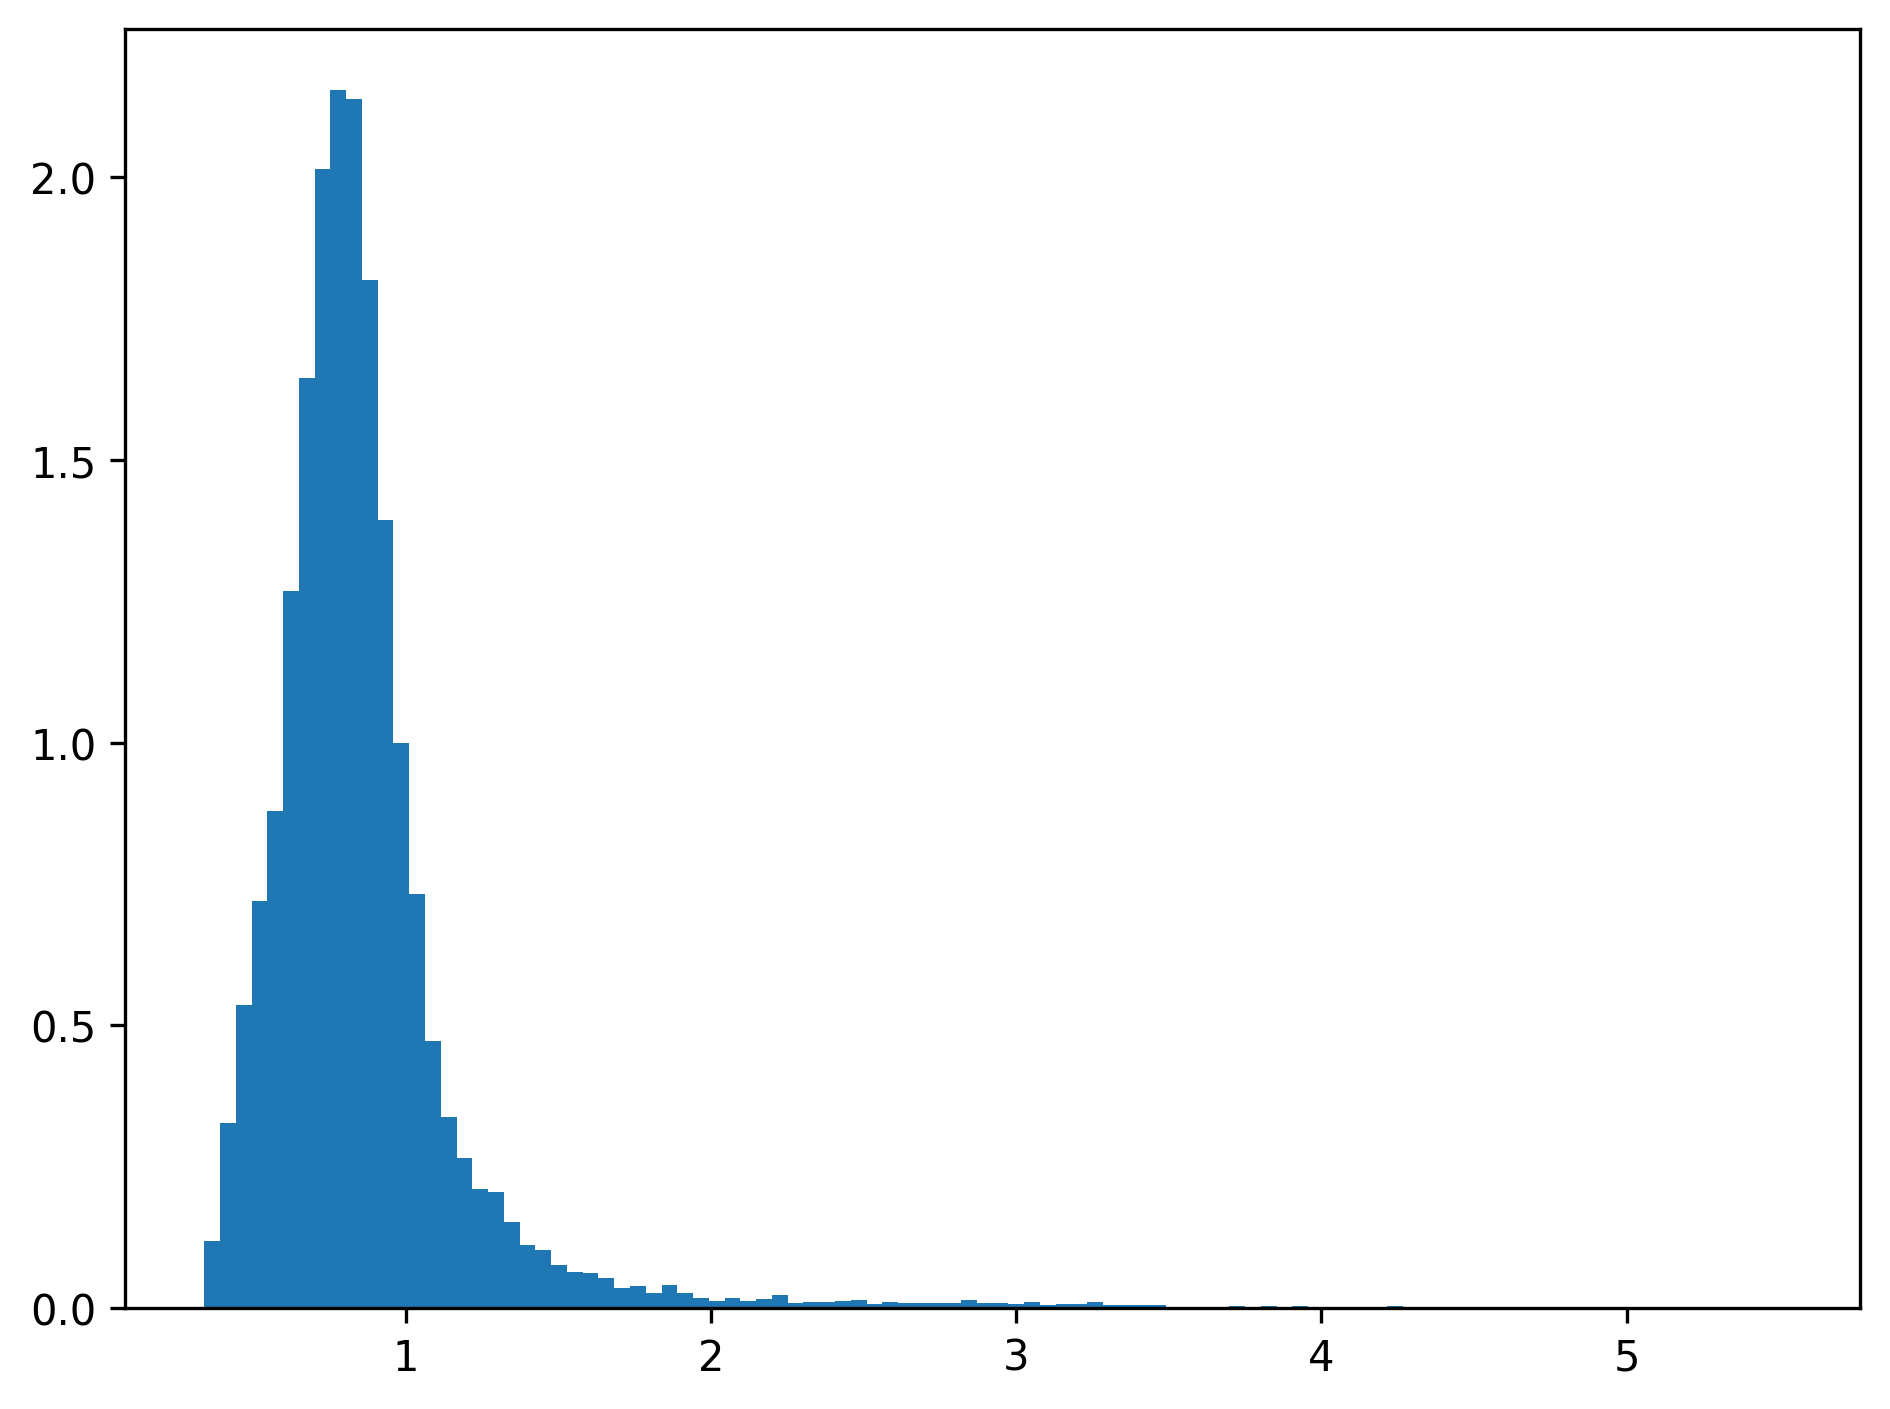

In [5]:
def pl_hist(df, column, n_bins=100,):
    data = df.select(pl.col(column))
    
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    ax.hist(data, bins=n_bins, density=True)
    
    plt.show()
    plt.close()
    
pl_hist(exprData, "mean.cluster")

{'seriesOrder': ['cluster.1', 'cluster.2', 'cluster.3']}
-1.0 9.0
centers [0.4, 0.8, 1.2, 1.6, 2, 2.4]
Creating Universe Range -1.0 -> 9.0 with step size 0.1
Mean Expr mean.cluster col 7
Expr Count expr.cluster col 12
SD sd.cluster col 8
Cluster cluster col 0
Combining over state:  False


/mnt/raidbio/extproj/projekte/FlowSets/examples/../flowset.py:651: RuntimeWarning: invalid value encountered in divide
  values = fuzz.trimf(self.universe, abc)/unscaledValues


to_homogeneous: cluster.1
to_homogeneous: cluster.3
to_homogeneous: cluster.2


shape: (16_585, 19)
┌──────────┬────────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ gene     ┆ HIGH.clust ┆ LOW.cluste ┆ LOWMED.clu ┆ … ┆ LOWMED.clu ┆ MED.cluste ┆ MEDHIGH.cl ┆ NO.cluster │
│ ---      ┆ er.1       ┆ r.1        ┆ ster.1     ┆   ┆ ster.2     ┆ r.2        ┆ uster.2    ┆ .2         │
│ str      ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│          ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞══════════╪════════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ HES4     ┆ 0.028591   ┆ 0.046718   ┆ 0.071098   ┆ … ┆ 0.071283   ┆ 0.059649   ┆ 0.021669   ┆ 0.780682   │
│ ISG15    ┆ 0.646818   ┆ 0.001971   ┆ 0.018461   ┆ … ┆ 0.145492   ┆ 0.156525   ┆ 0.070498   ┆ 0.469692   │
│ AGRN     ┆ 0.0        ┆ 0.063498   ┆ 0.035587   ┆ … ┆ 0.021075   ┆ 0.002072   ┆ 0.0        ┆ 0.947585   │
│ SDF4     ┆ 0.0        ┆ 0.12374    ┆ 0.146852   ┆ … ┆ 0.114222   ┆ 0.033915   ┆ 0.00033    ┆ 0.669547   │
│ …        ┆ …          ┆ …          ┆ …          ┆ … ┆ …          ┆ …          ┆ …          ┆ …          │
│ SCARNA9  ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.99621    │
│ CEP112   ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.002171   ┆ 0.002637   ┆ 0.0        ┆ 0.995192   │
│ ITPR1-DT ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.002652   ┆ 0.0        ┆ 0.0        ┆ 0.995192   │
│ CRISPLD1 ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ … ┆ 0.002652   ┆ 0.0        ┆ 0.0        ┆ 0.995192   │
└──────────┴────────────┴────────────┴────────────┴───┴────────────┴────────────┴────────────┴────────────┘

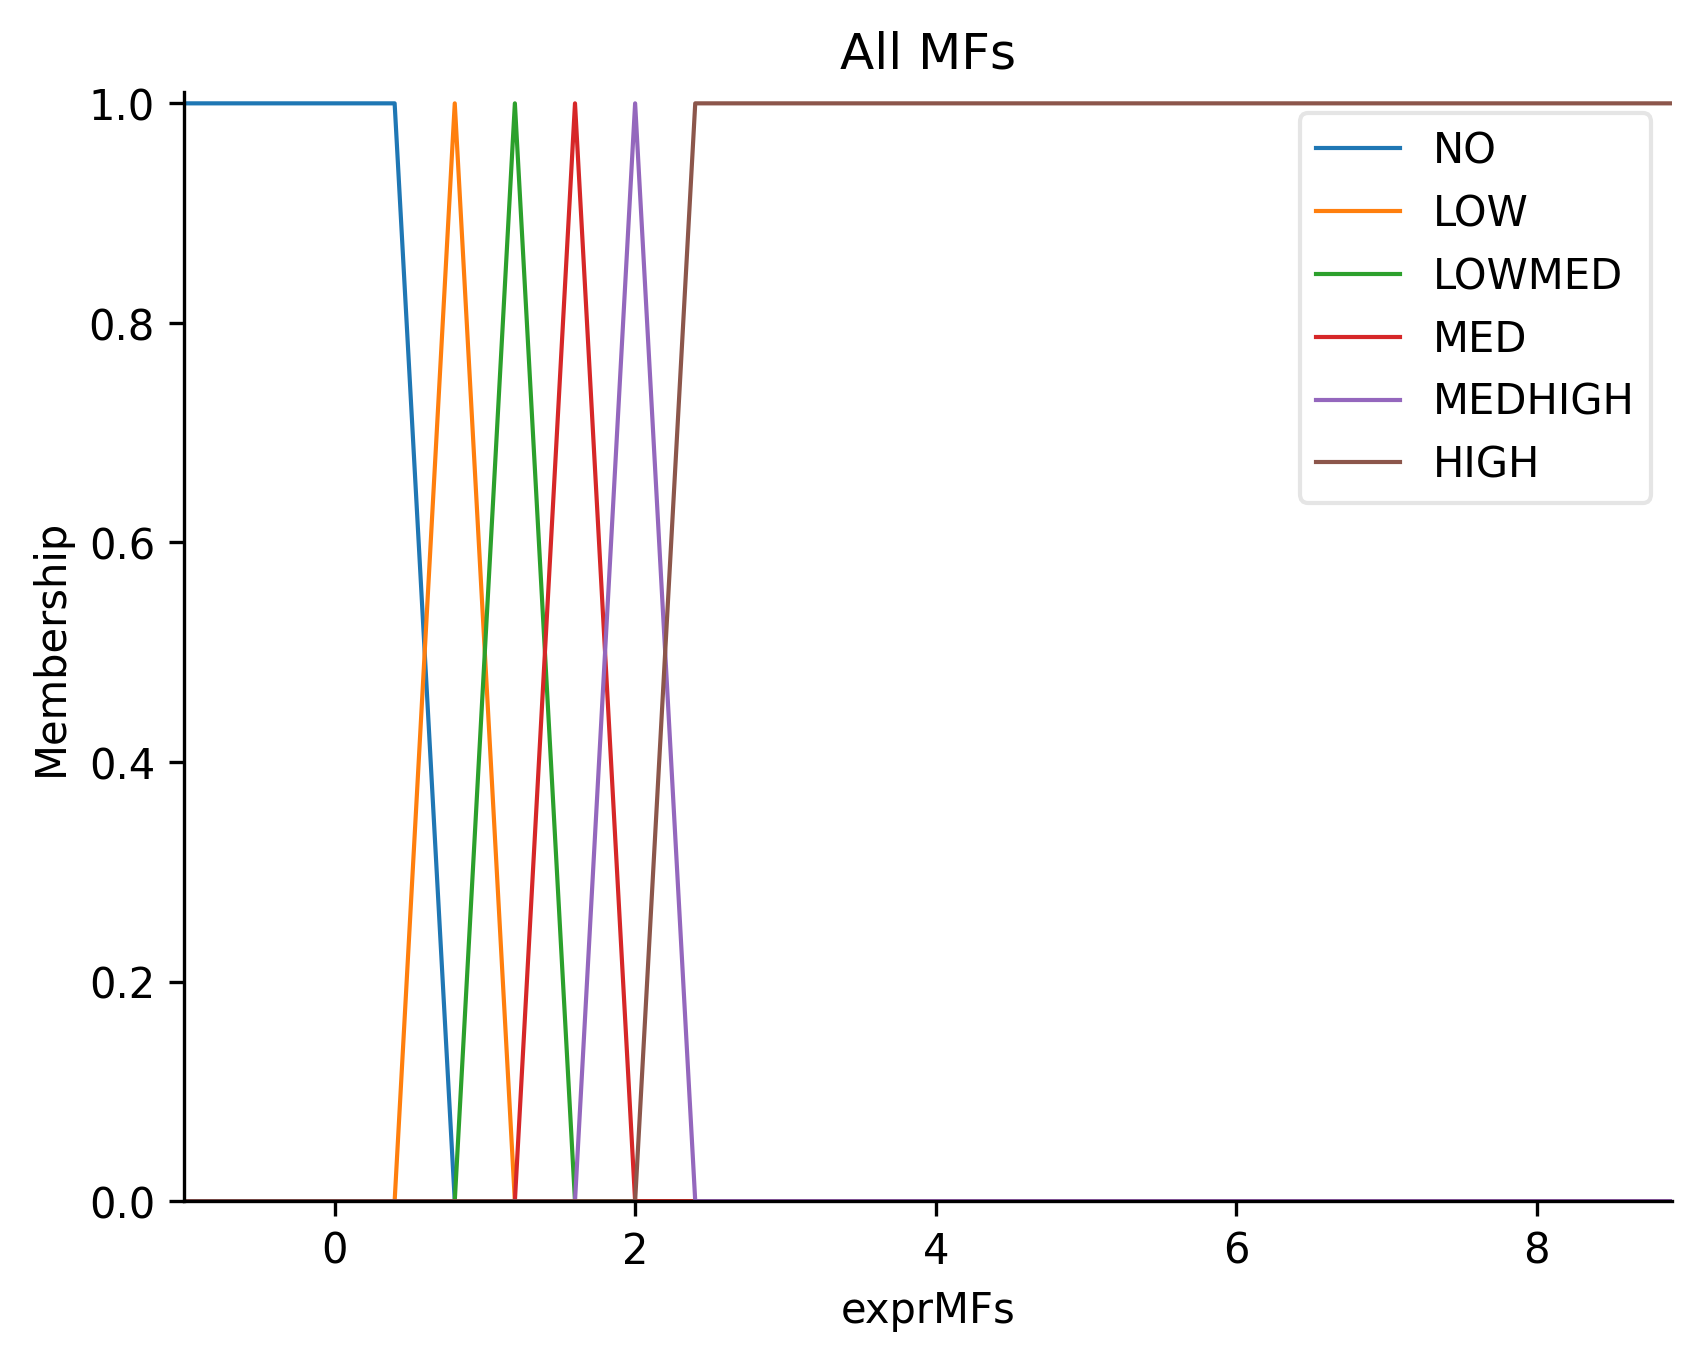

In [6]:
explDFRaw, mfFuzzy = FlowAnalysis.fuzzify_exprvalues(exprData, stepsize=0.1, seriesOrder=["cluster.1","cluster.2","cluster.3"], mfLevels = ["NO","LOW","LOWMED","MED", "MEDHIGH", "HIGH"], centers=[0.4, 0.8, 1.2, 1.6, 2, 2.4]) #"cluster.thrombus"
explDFWide = FlowAnalysis.to_vwide(explDFRaw, mfFuzzy)
explDFWide

In [7]:
isgListLong = sorted(set(["MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8"]))
isgListShort = sorted(set(["MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1"]))

In [9]:
fa = FlowAnalysis(explDFWide, "gene", (  ("1", "TP 1"),("2", "TP 2"),("3", "TP 3")), mfFuzzy, sep=".cluster.") #("thrombus", "Thrombus"),

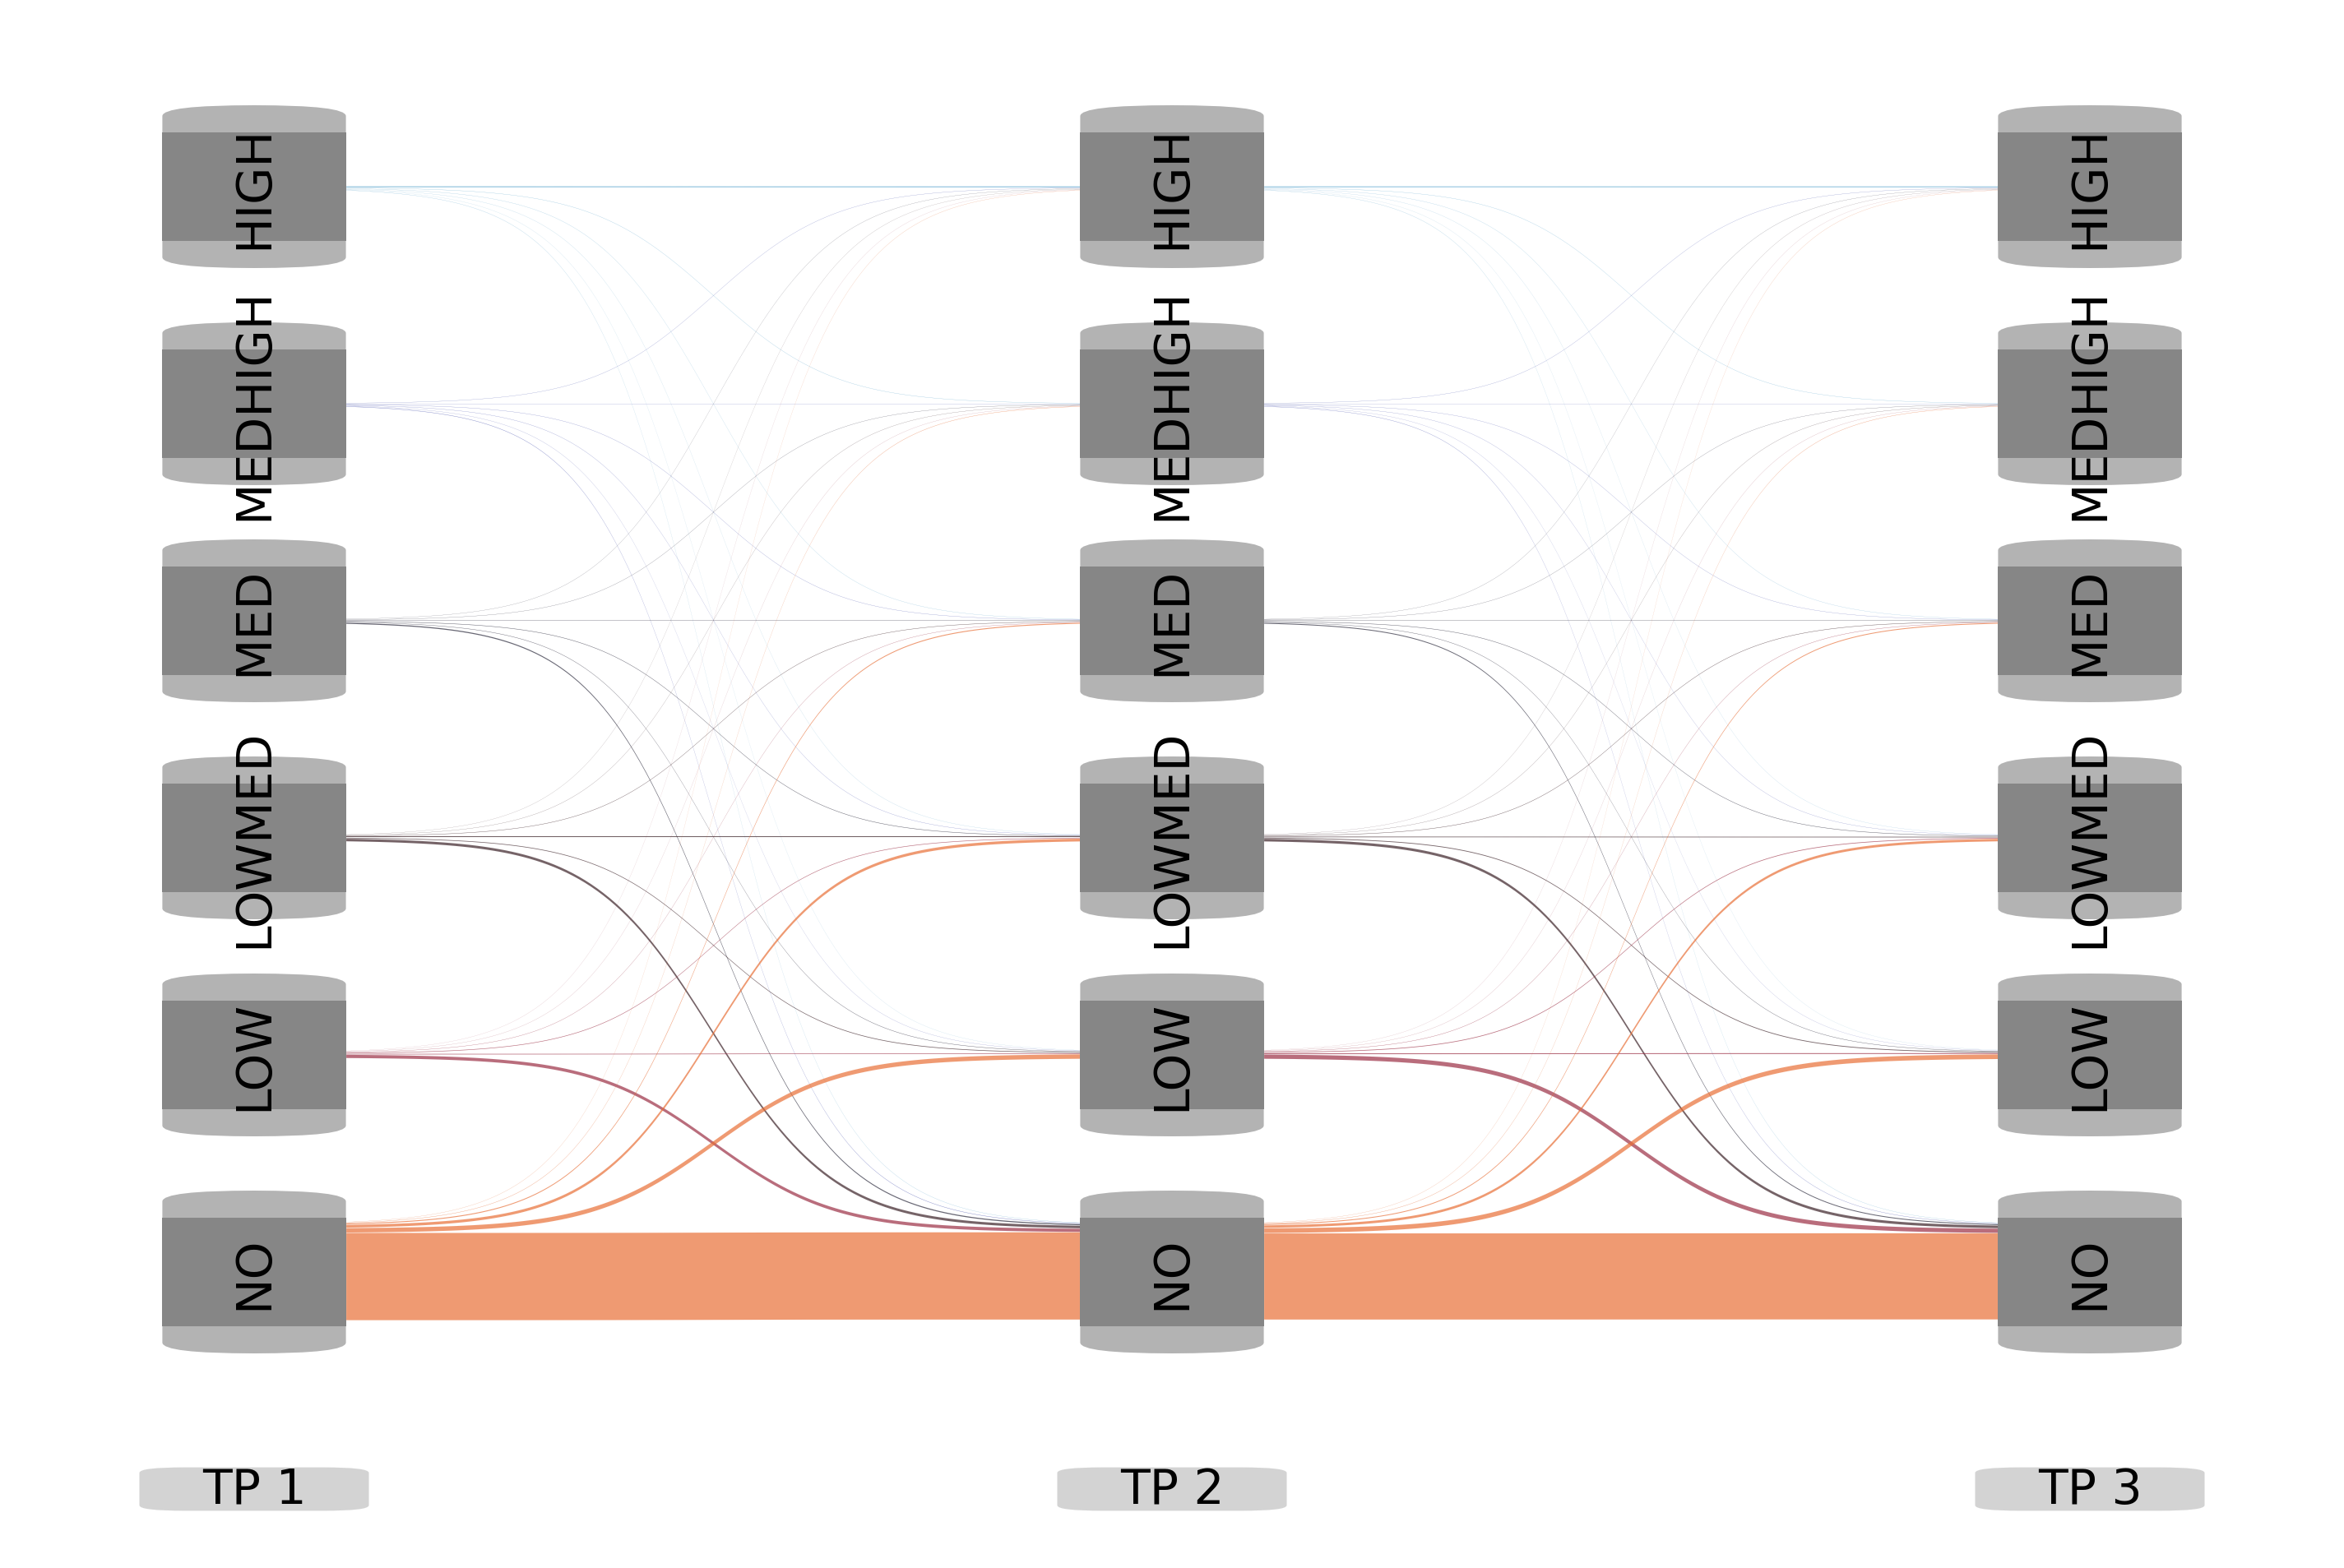

In [10]:
fa.plot_flows(verbose=False)

Figure Size (12, 14)


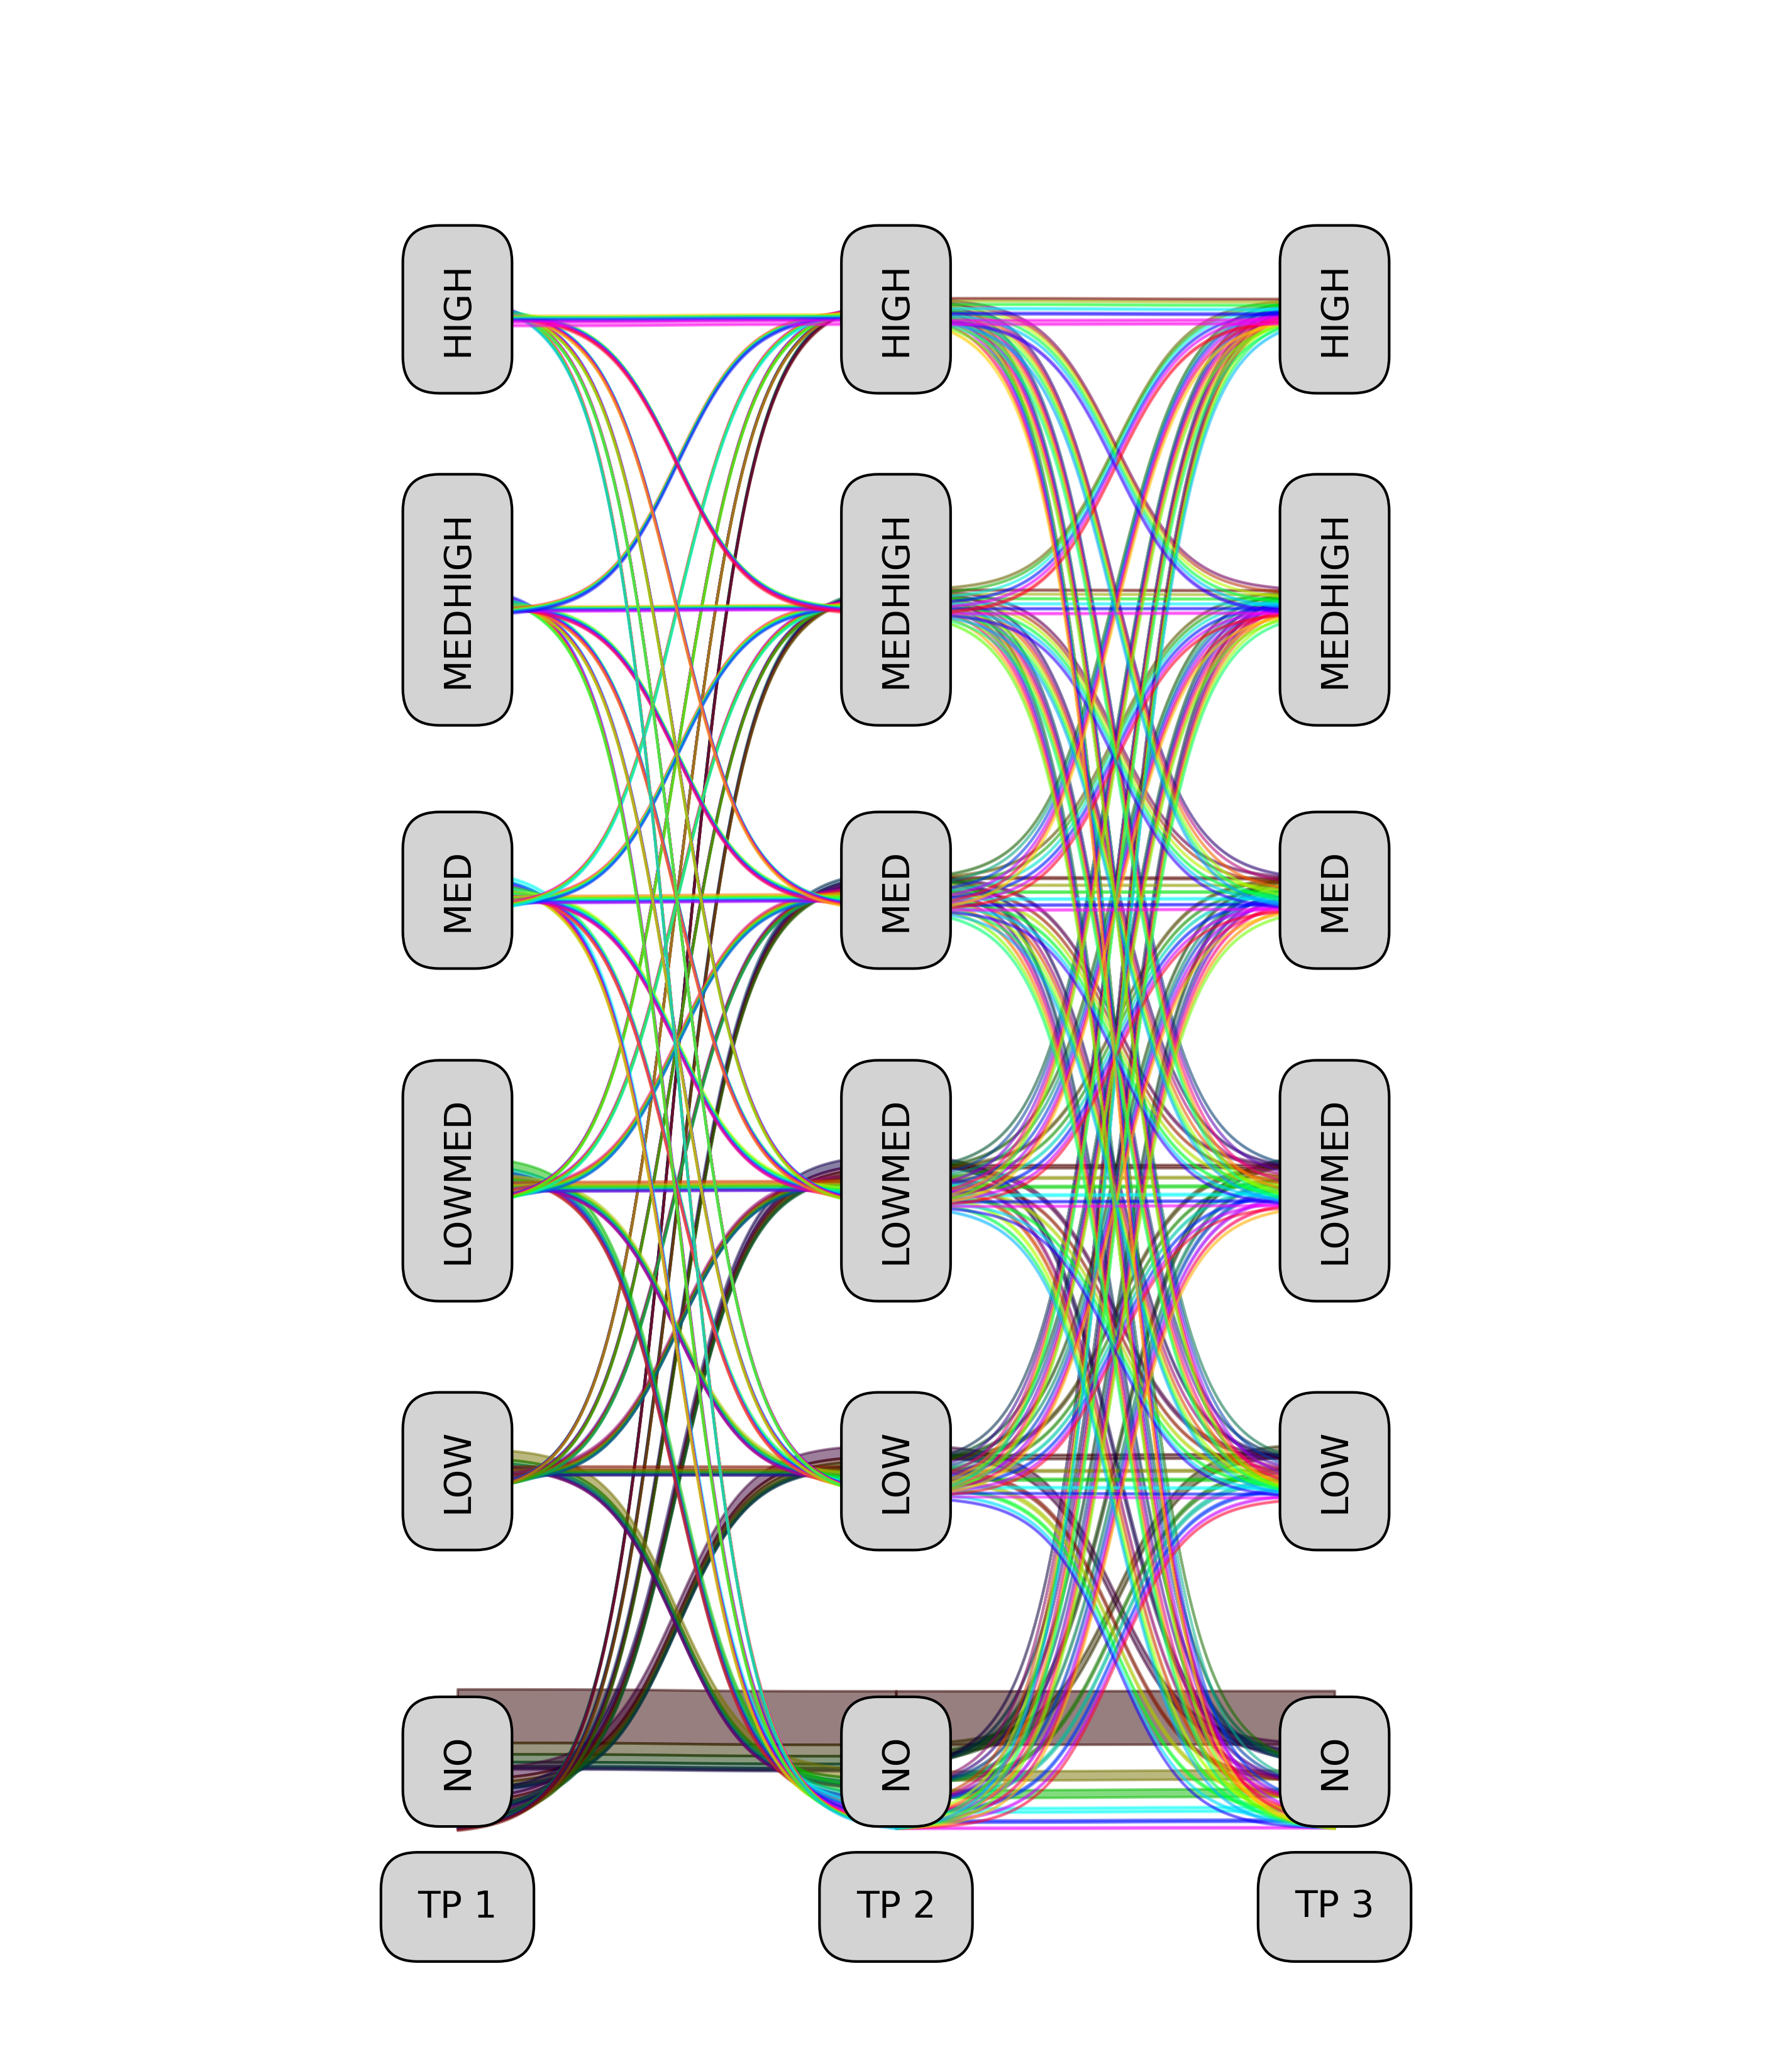

In [9]:
fa.plot_flows(outfile="plots/asympt_flows")

72 [('1', 'LOWMED'), ('2', 'NO'), ('3', 'NO')]
78 [('1', 'LOWMED'), ('2', 'LOW'), ('3', 'NO')]
79 [('1', 'LOWMED'), ('2', 'LOW'), ('3', 'LOW')]
108 [('1', 'MED'), ('2', 'NO'), ('3', 'NO')]
114 [('1', 'MED'), ('2', 'LOW'), ('3', 'NO')]
115 [('1', 'MED'), ('2', 'LOW'), ('3', 'LOW')]
120 [('1', 'MED'), ('2', 'LOWMED'), ('3', 'NO')]
121 [('1', 'MED'), ('2', 'LOWMED'), ('3', 'LOW')]
144 [('1', 'MEDHIGH'), ('2', 'NO'), ('3', 'NO')]
150 [('1', 'MEDHIGH'), ('2', 'LOW'), ('3', 'NO')]
151 [('1', 'MEDHIGH'), ('2', 'LOW'), ('3', 'LOW')]
156 [('1', 'MEDHIGH'), ('2', 'LOWMED'), ('3', 'NO')]
157 [('1', 'MEDHIGH'), ('2', 'LOWMED'), ('3', 'LOW')]
162 [('1', 'MEDHIGH'), ('2', 'MED'), ('3', 'NO')]
163 [('1', 'MEDHIGH'), ('2', 'MED'), ('3', 'LOW')]
180 [('1', 'HIGH'), ('2', 'NO'), ('3', 'NO')]
186 [('1', 'HIGH'), ('2', 'LOW'), ('3', 'NO')]
187 [('1', 'HIGH'), ('2', 'LOW'), ('3', 'LOW')]
192 [('1', 'HIGH'), ('2', 'LOWMED'), ('3', 'NO')]
193 [('1', 'HIGH'), ('2', 'LOWMED'), ('3', 'LOW')]
198 [('1', 'HIGH'),

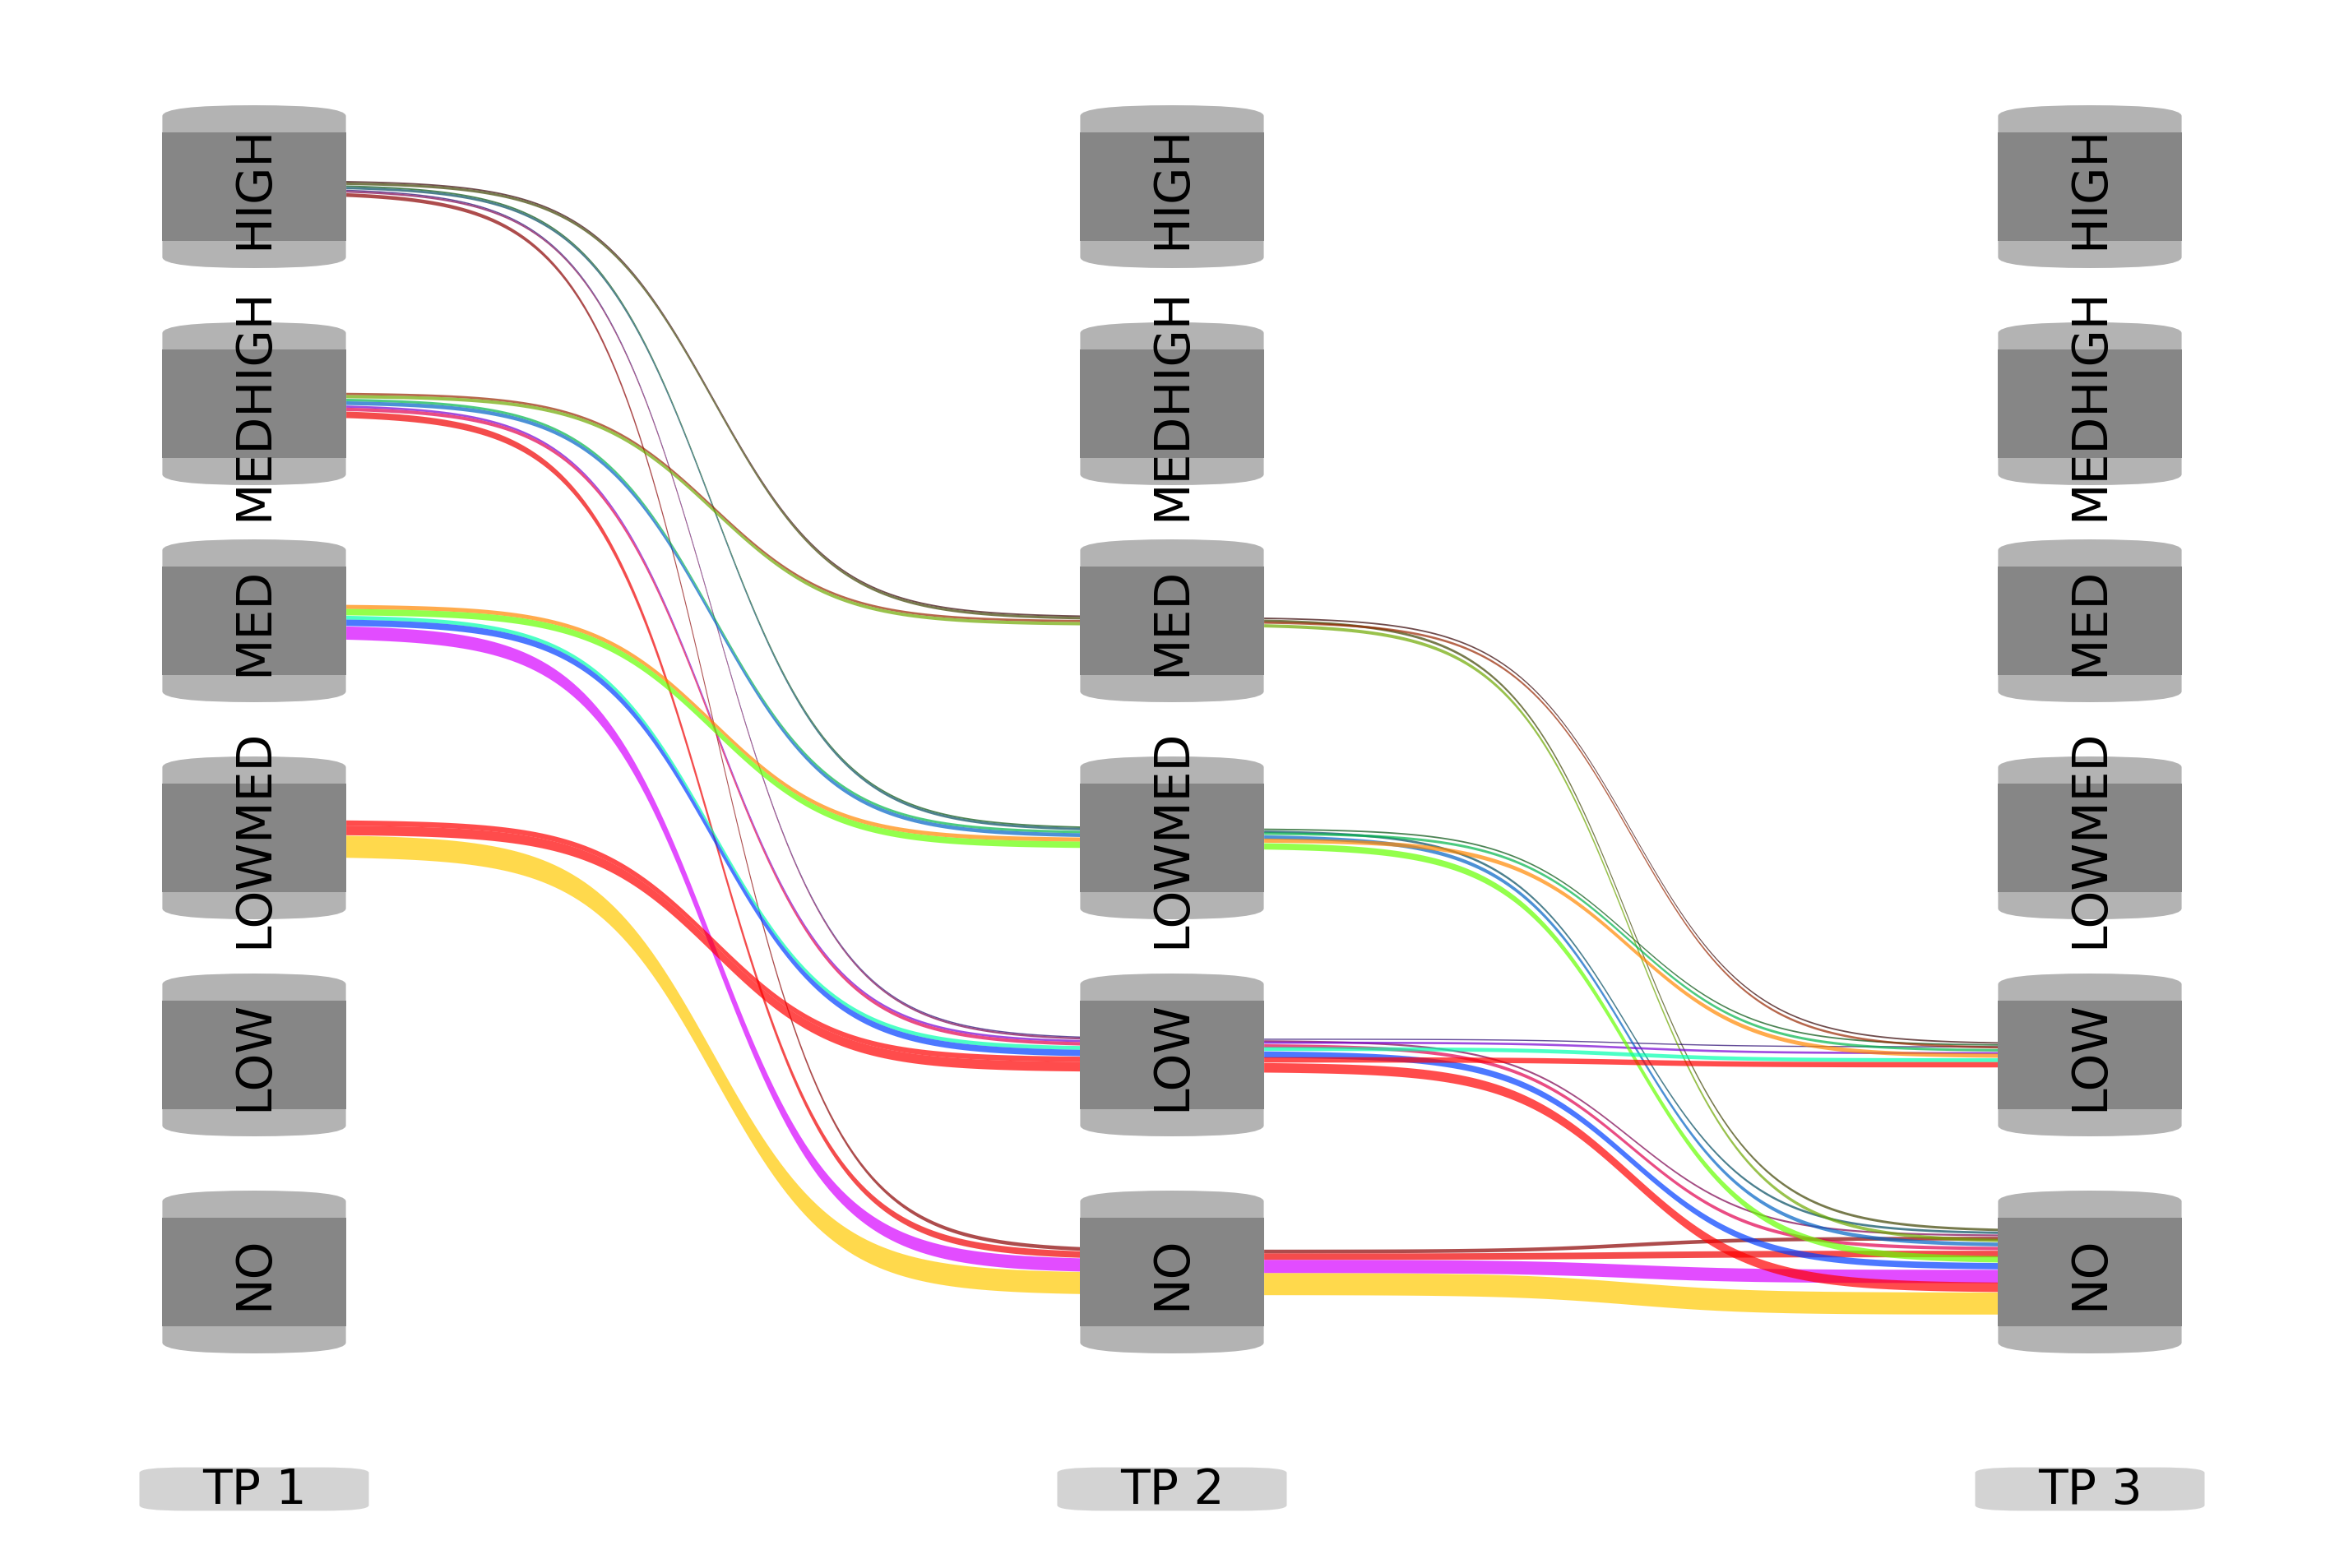

In [19]:
relFlows = fa.path_finder([">", ">="], minLevels=["LOWMED", None, None], maxLevels=["HIGH", "MED", "LOW"], verbose=True)

fa.plot_paths(use_flows=relFlows)

In [28]:
# convert paths to edges

relEdges = fa.paths2edges(relFlows)

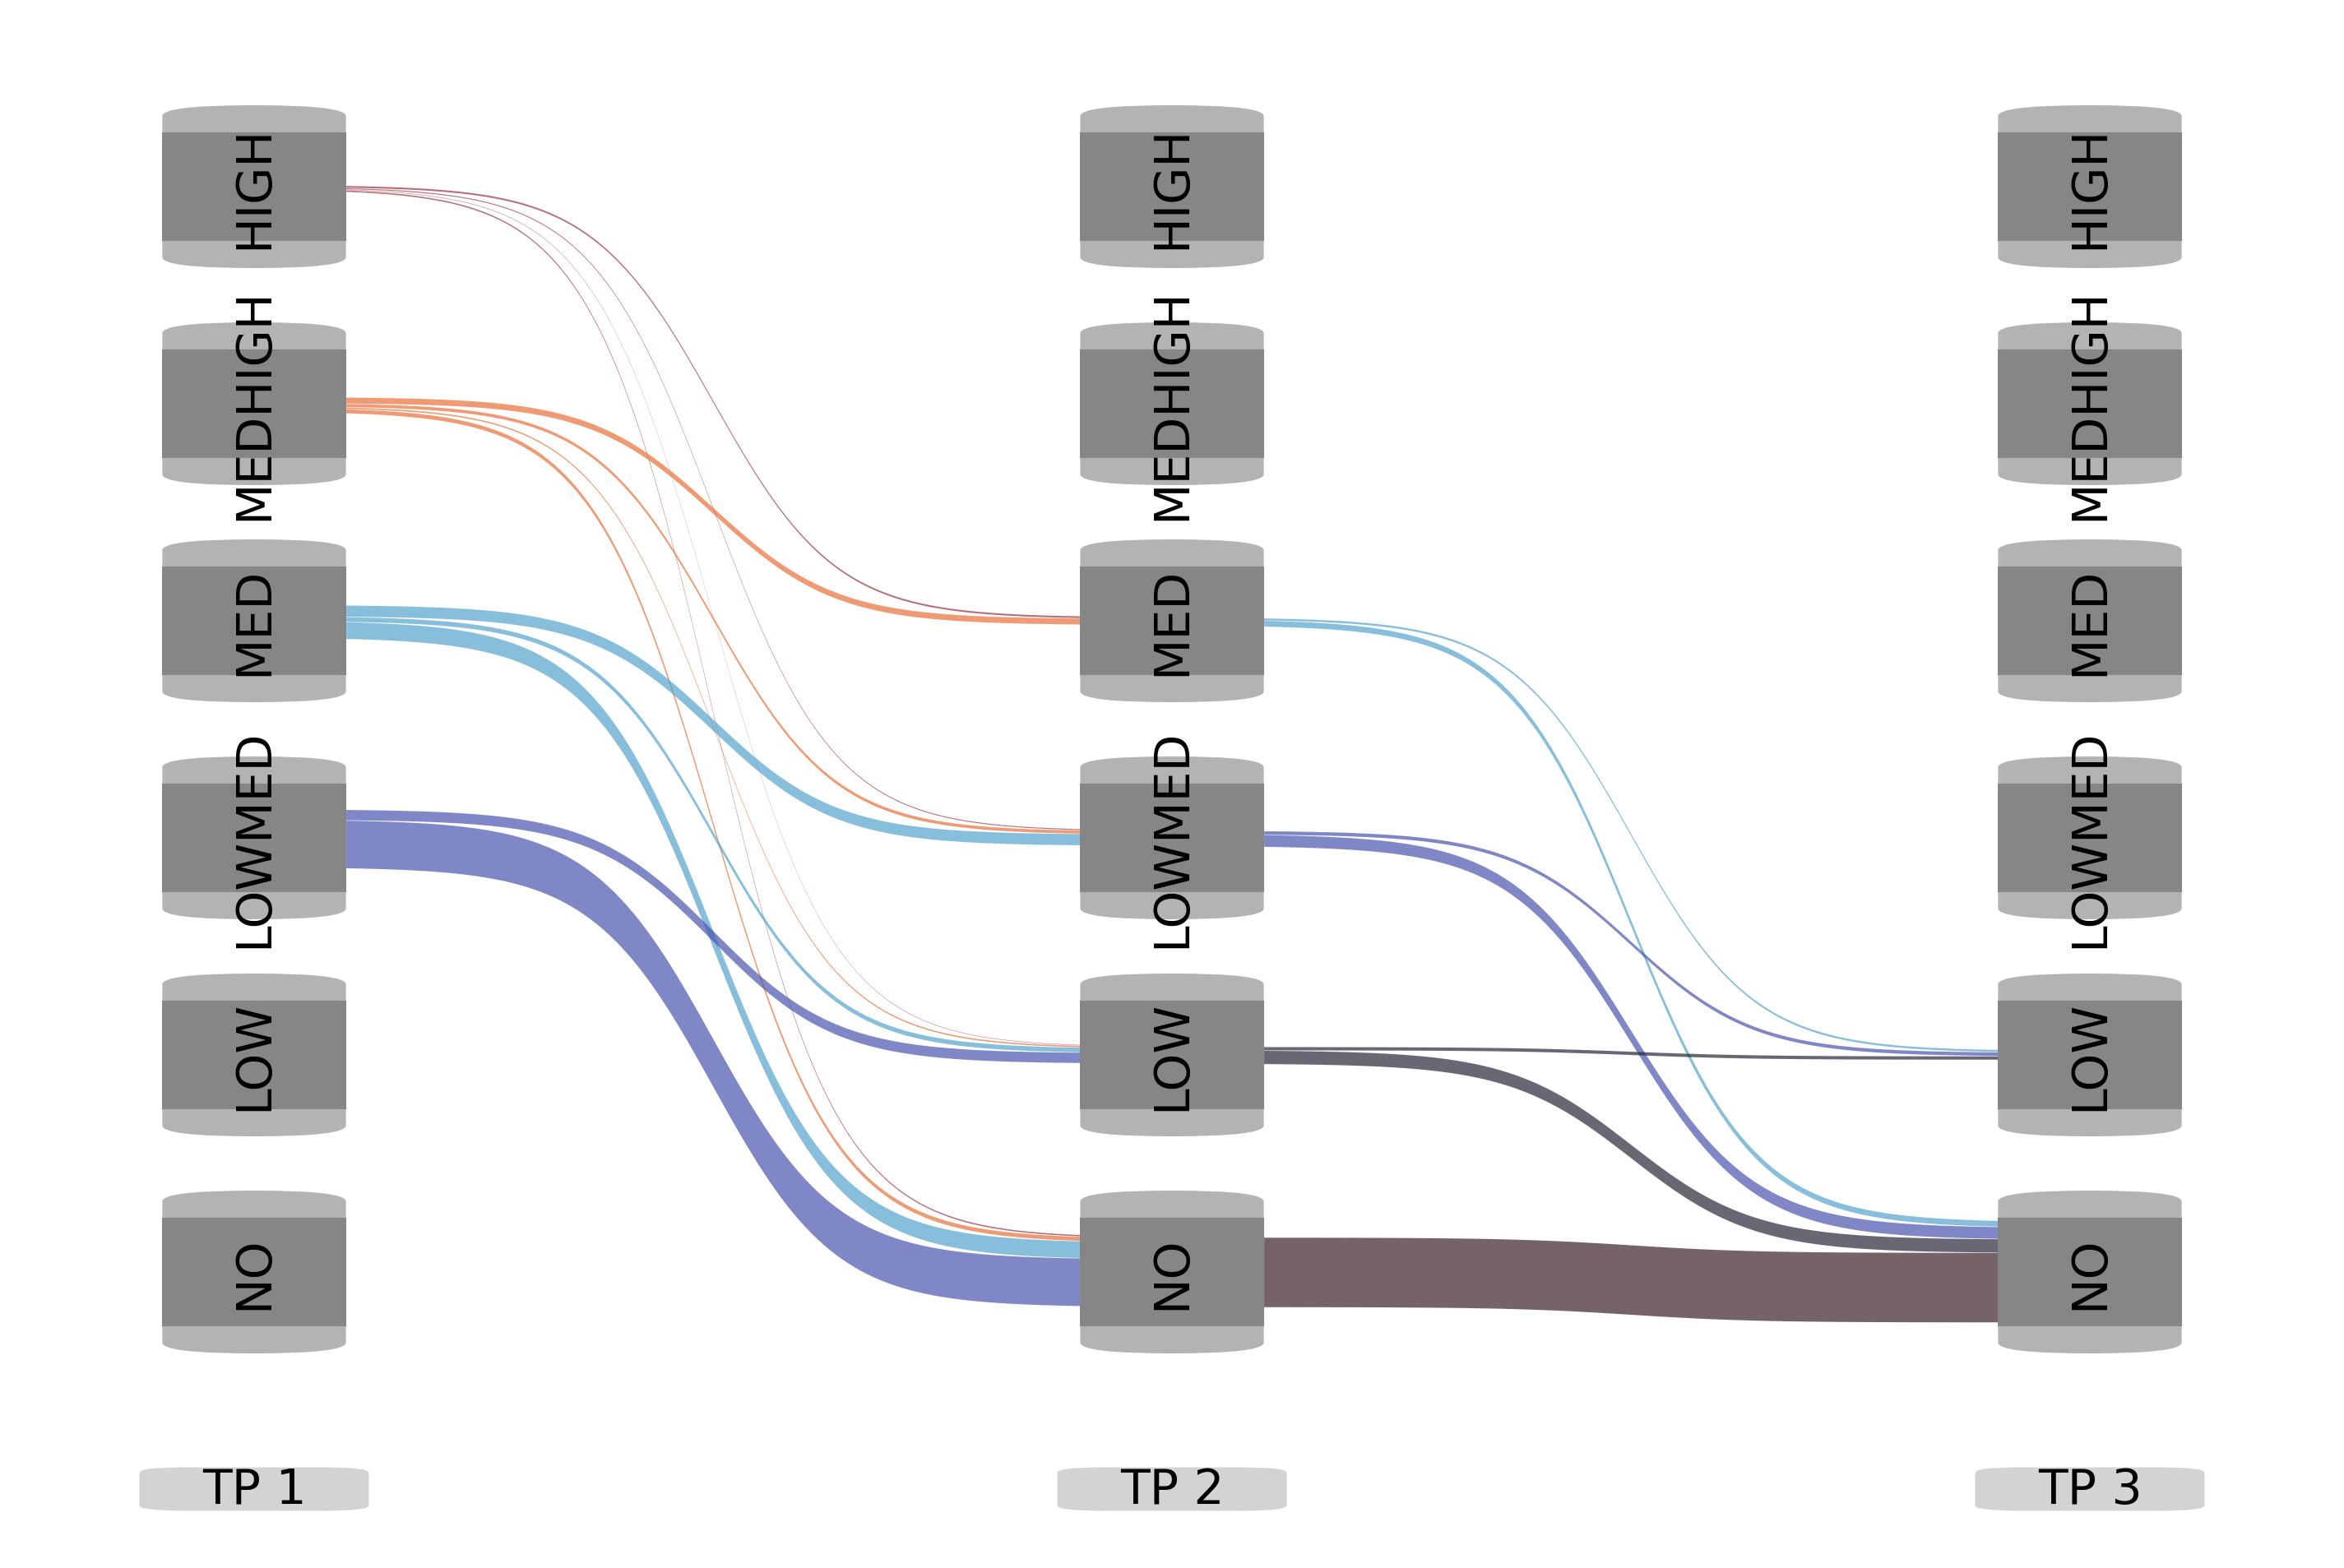

In [30]:
fa.plot_flows(relEdges)

In [35]:
fa.seriesOrder

['1', '2', '3']

In [62]:
fa.edges2paths(relEdges)

{(('1', 'MEDHIGH'), ('2', 'NO')), (('1', 'MED'), ('2', 'LOW')), (('1', 'MEDHIGH'), ('2', 'LOWMED')), (('1', 'MEDHIGH'), ('2', 'MED')), (('1', 'HIGH'), ('2', 'NO')), (('1', 'LOWMED'), ('2', 'NO')), (('1', 'MED'), ('2', 'NO')), (('1', 'MED'), ('2', 'LOWMED')), (('1', 'MEDHIGH'), ('2', 'LOW')), (('1', 'HIGH'), ('2', 'LOWMED')), (('1', 'HIGH'), ('2', 'MED')), (('1', 'LOWMED'), ('2', 'LOW')), (('1', 'HIGH'), ('2', 'LOW'))}


{(('1', 'HIGH'), ('2', 'LOW'), ('3', 'LOW')),
 (('1', 'HIGH'), ('2', 'LOW'), ('3', 'NO')),
 (('1', 'HIGH'), ('2', 'LOWMED'), ('3', 'LOW')),
 (('1', 'HIGH'), ('2', 'LOWMED'), ('3', 'NO')),
 (('1', 'HIGH'), ('2', 'MED'), ('3', 'LOW')),
 (('1', 'HIGH'), ('2', 'MED'), ('3', 'NO')),
 (('1', 'HIGH'), ('2', 'NO'), ('3', 'NO')),
 (('1', 'LOWMED'), ('2', 'LOW'), ('3', 'LOW')),
 (('1', 'LOWMED'), ('2', 'LOW'), ('3', 'NO')),
 (('1', 'LOWMED'), ('2', 'NO'), ('3', 'NO')),
 (('1', 'MED'), ('2', 'LOW'), ('3', 'LOW')),
 (('1', 'MED'), ('2', 'LOW'), ('3', 'NO')),
 (('1', 'MED'), ('2', 'LOWMED'), ('3', 'LOW')),
 (('1', 'MED'), ('2', 'LOWMED'), ('3', 'NO')),
 (('1', 'MED'), ('2', 'NO'), ('3', 'NO')),
 (('1', 'MEDHIGH'), ('2', 'LOW'), ('3', 'LOW')),
 (('1', 'MEDHIGH'), ('2', 'LOW'), ('3', 'NO')),
 (('1', 'MEDHIGH'), ('2', 'LOWMED'), ('3', 'LOW')),
 (('1', 'MEDHIGH'), ('2', 'LOWMED'), ('3', 'NO')),
 (('1', 'MEDHIGH'), ('2', 'MED'), ('3', 'LOW')),
 (('1', 'MEDHIGH'), ('2', 'MED'), ('3', 'NO')),
 (('1', 'MED

In [33]:
pwScoresGrp = fa.analyse_pathways(additional_genesets=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_edges=relEdges)
pwScoresGrp

Loading pathways from ReactomePathways.gmt
Identified 2612 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100, 2605]


pwid                                             pwname  \
14     R-HSA-112122      ALKBH2 mediated reversal of alkylation damage   
17    R-HSA-5467333  APC truncation mutants are not K63 polyubiquit...   
30    R-HSA-9717264                     ASP-3026-resistant ALK mutants   
46    R-HSA-2978092  Abnormal conversion of 2-oxoglutarate to 2-hyd...   
160    R-HSA-211957  Aromatic amines can be N-hydroxylated or N-dea...   
...             ...                                                ...   
2566    R-HSA-72172                                      mRNA Splicing   
2567    R-HSA-72163                      mRNA Splicing - Major Pathway   
2592    R-HSA-72312                                    rRNA processing   
2594  R-HSA-8868773         rRNA processing in the nucleus and cytosol   
2603    R-HSA-72306                                    tRNA processing   

         pwFlow  pwGenes   allPwFlow  allPwGenes  pw_gene_intersection  \
14     0.005401        1  553.170728   7670.0002                     1   
17     0.054999        1  553.170728   7670.0002                     1   
30     0.000000        1  553.170728   7670.0002                     0   
46     0.033587        1  553.170728   7670.0002                     1   
160    0.000000        1  553.170728   7670.0002                     0   
...         ...      ...         ...         ...                   ...   
2566  16.741970      215  553.170728   7670.0002                   209   
2567  16.464921      204  553.170728   7670.0002                   201   
2592   6.029719      237  553.170728   7670.0002                   210   
2594   5.763279      199  553.170728   7670.0002                   188   
2603   3.856692      146  553.170728   7670.0002                   119   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
14       0.005401        0.000010   5.273203e-08           -0.856852   
17       0.054999        0.000099   5.468323e-06            0.257471   
30       0.000000        0.000000   0.000000e+00           -0.978194   
46       0.033587        0.000061   2.039257e-06           -0.223606   
160      0.000000        0.000000   0.000000e+00           -0.978194   
...           ...             ...            ...                 ...   
2566     0.077870        0.030265   2.356761e-03            1.873352   
2567     0.080710        0.029765   2.402315e-03            2.029272   
2592     0.025442        0.010900   2.773234e-04           -1.004220   
2594     0.028961        0.010419   3.017360e-04           -0.811056   
2603     0.026416        0.006972   1.841696e-04           -0.950769   

      pw_coverage_pval  pw_coverage_adj_pval  
14            1.000000              1.000000  
17            0.398408              1.000000  
30            1.000000              1.000000  
46            1.000000              1.000000  
160           1.000000              1.000000  
...                ...                   ...  
2566          0.030510              0.907552  
2567          0.021215              0.870998  
2592          1.000000              1.000000  
2594          1.000000              1.000000  
2603          1.000000              1.000000  

[2614 rows x 13 columns]

pwid                                             pwname   
2584      ISG_SHORT                                          ISG_SHORT  \
413   R-HSA-3134963  DEx/H-box helicases activate type I IFN and in...   
1854  R-HSA-9707587        Regulation of HMOX1 expression and activity   
1300  R-HSA-2206292                             MPS VII - Sly syndrome   
2261  R-HSA-6791462  TALDO1 deficiency: failed conversion of  Fru(6...   
2262  R-HSA-6791055  TALDO1 deficiency: failed conversion of SH7P, ...   
894    R-HSA-163210          Formation of ATP by chemiosmotic coupling   
104    R-HSA-114294  Activation, translocation and oligomerization ...   
2332   R-HSA-844615                              The AIM2 inflammasome   
463   R-HSA-9734195            Defective APRT disrupts adenine salvage   
222   R-HSA-9026403  Biosynthesis of DPAn-3-derived 13-series resol...   
1940   R-HSA-163200  Respiratory electron transport, ATP synthesis ...   
204     R-HSA-77305   Beta oxidation of palmitoyl-CoA to myristoyl-CoA   
1886   R-HSA-211733  Regulation of activated PAK-2p34 by proteasome...   
2585       ISG_LONG                                           ISG_LONG   
1939   R-HSA-611105                     Respiratory electron transport   
392   R-HSA-1236978  Cross-presentation of soluble exogenous antige...   
242    R-HSA-352238                    Breakdown of the nuclear lamina   
1857   R-HSA-877312                       Regulation of IFNG signaling   
843   R-HSA-2644605                 FBXW7 Mutants and NOTCH1 in Cancer   

         pwFlow  pwGenes   allPwFlow  allPwGenes  pw_gene_intersection   
2584   4.298351       14  360.725949  7624.00014                    14  \
413    1.125952        7  360.725949  7624.00014                     7   
1854   0.753206        5  360.725949  7624.00014                     5   
1300   0.195209        1  360.725949  7624.00014                     1   
2261   0.182301        1  360.725949  7624.00014                     1   
2262   0.182301        1  360.725949  7624.00014                     1   
894    2.121406       18  360.725949  7624.00014                    18   
104    0.373103        2  360.725949  7624.00014                     2   
2332   0.414256        3  360.725949  7624.00014                     3   
463    0.186861        1  360.725949  7624.00014                     1   
222    0.181881        1  360.725949  7624.00014                     1   
1940  12.447412      127  360.725949  7624.00014                   124   
204    0.396471        3  360.725949  7624.00014                     3   
1886   5.614490       50  360.725949  7624.00014                    48   
2585   7.791589       55  360.725949  7624.00014                    40   
1939  10.102361      103  360.725949  7624.00014                   103   
392    5.545202       50  360.725949  7624.00014                    45   
242    0.387944        3  360.725949  7624.00014                     3   
1857   1.521821       14  360.725949  7624.00014                    14   
843    0.638010        5  360.725949  7624.00014                     5   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore   
2584     0.307025        0.011916       0.003658           11.350470  \
413      0.160850        0.003121       0.000502            3.945107   
1854     0.150641        0.002088       0.000315            3.611001   
1300     0.195209        0.000541       0.000106            3.490472   
2261     0.182301        0.000505       0.000092            3.192111   
2262     0.182301        0.000505       0.000092            3.192111   
894      0.117856        0.005881       0.000693            3.279279   
104      0.186551        0.001034       0.000193            3.290345   
2332     0.138085        0.001148       0.000159            3.200090   
463      0.186861        0.000518       0.000097            3.297508   
222      0.181881        0.000504       0.000092            3.182402   
1940     0.098011        0.034507       0

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(10, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


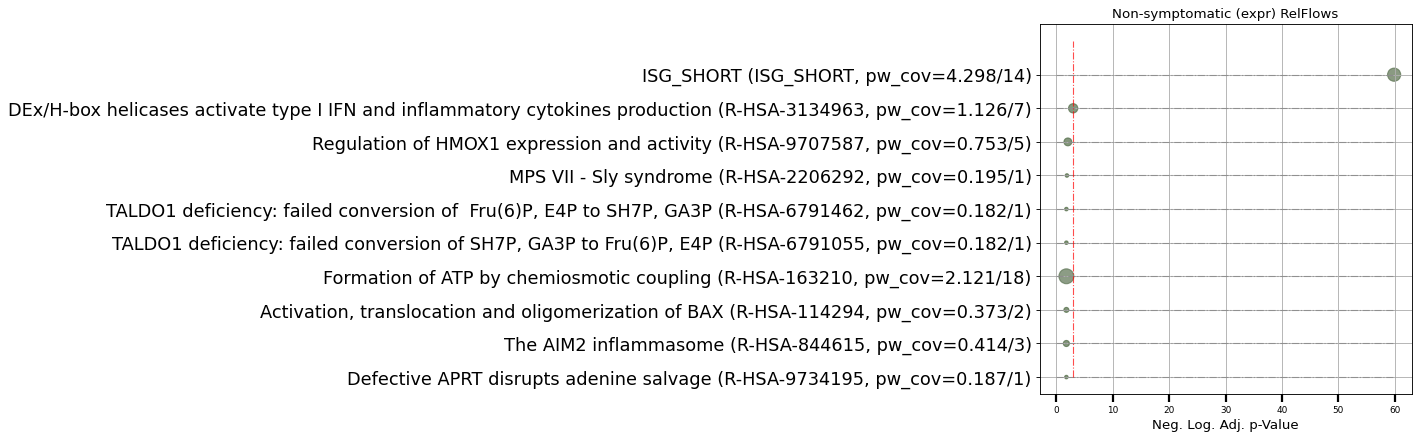

In [12]:
selPWsGrp = pwScoresGrp[(pwScoresGrp["adj_pval"] < 1)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsGrp)
fa.plotORAresult(selPWsGrp, "Non-symptomatic (expr) RelFlows", numResults=10, figsize=(6,6), outfile="plots/asympt_ra")

<Figure size 1800x1800 with 0 Axes>

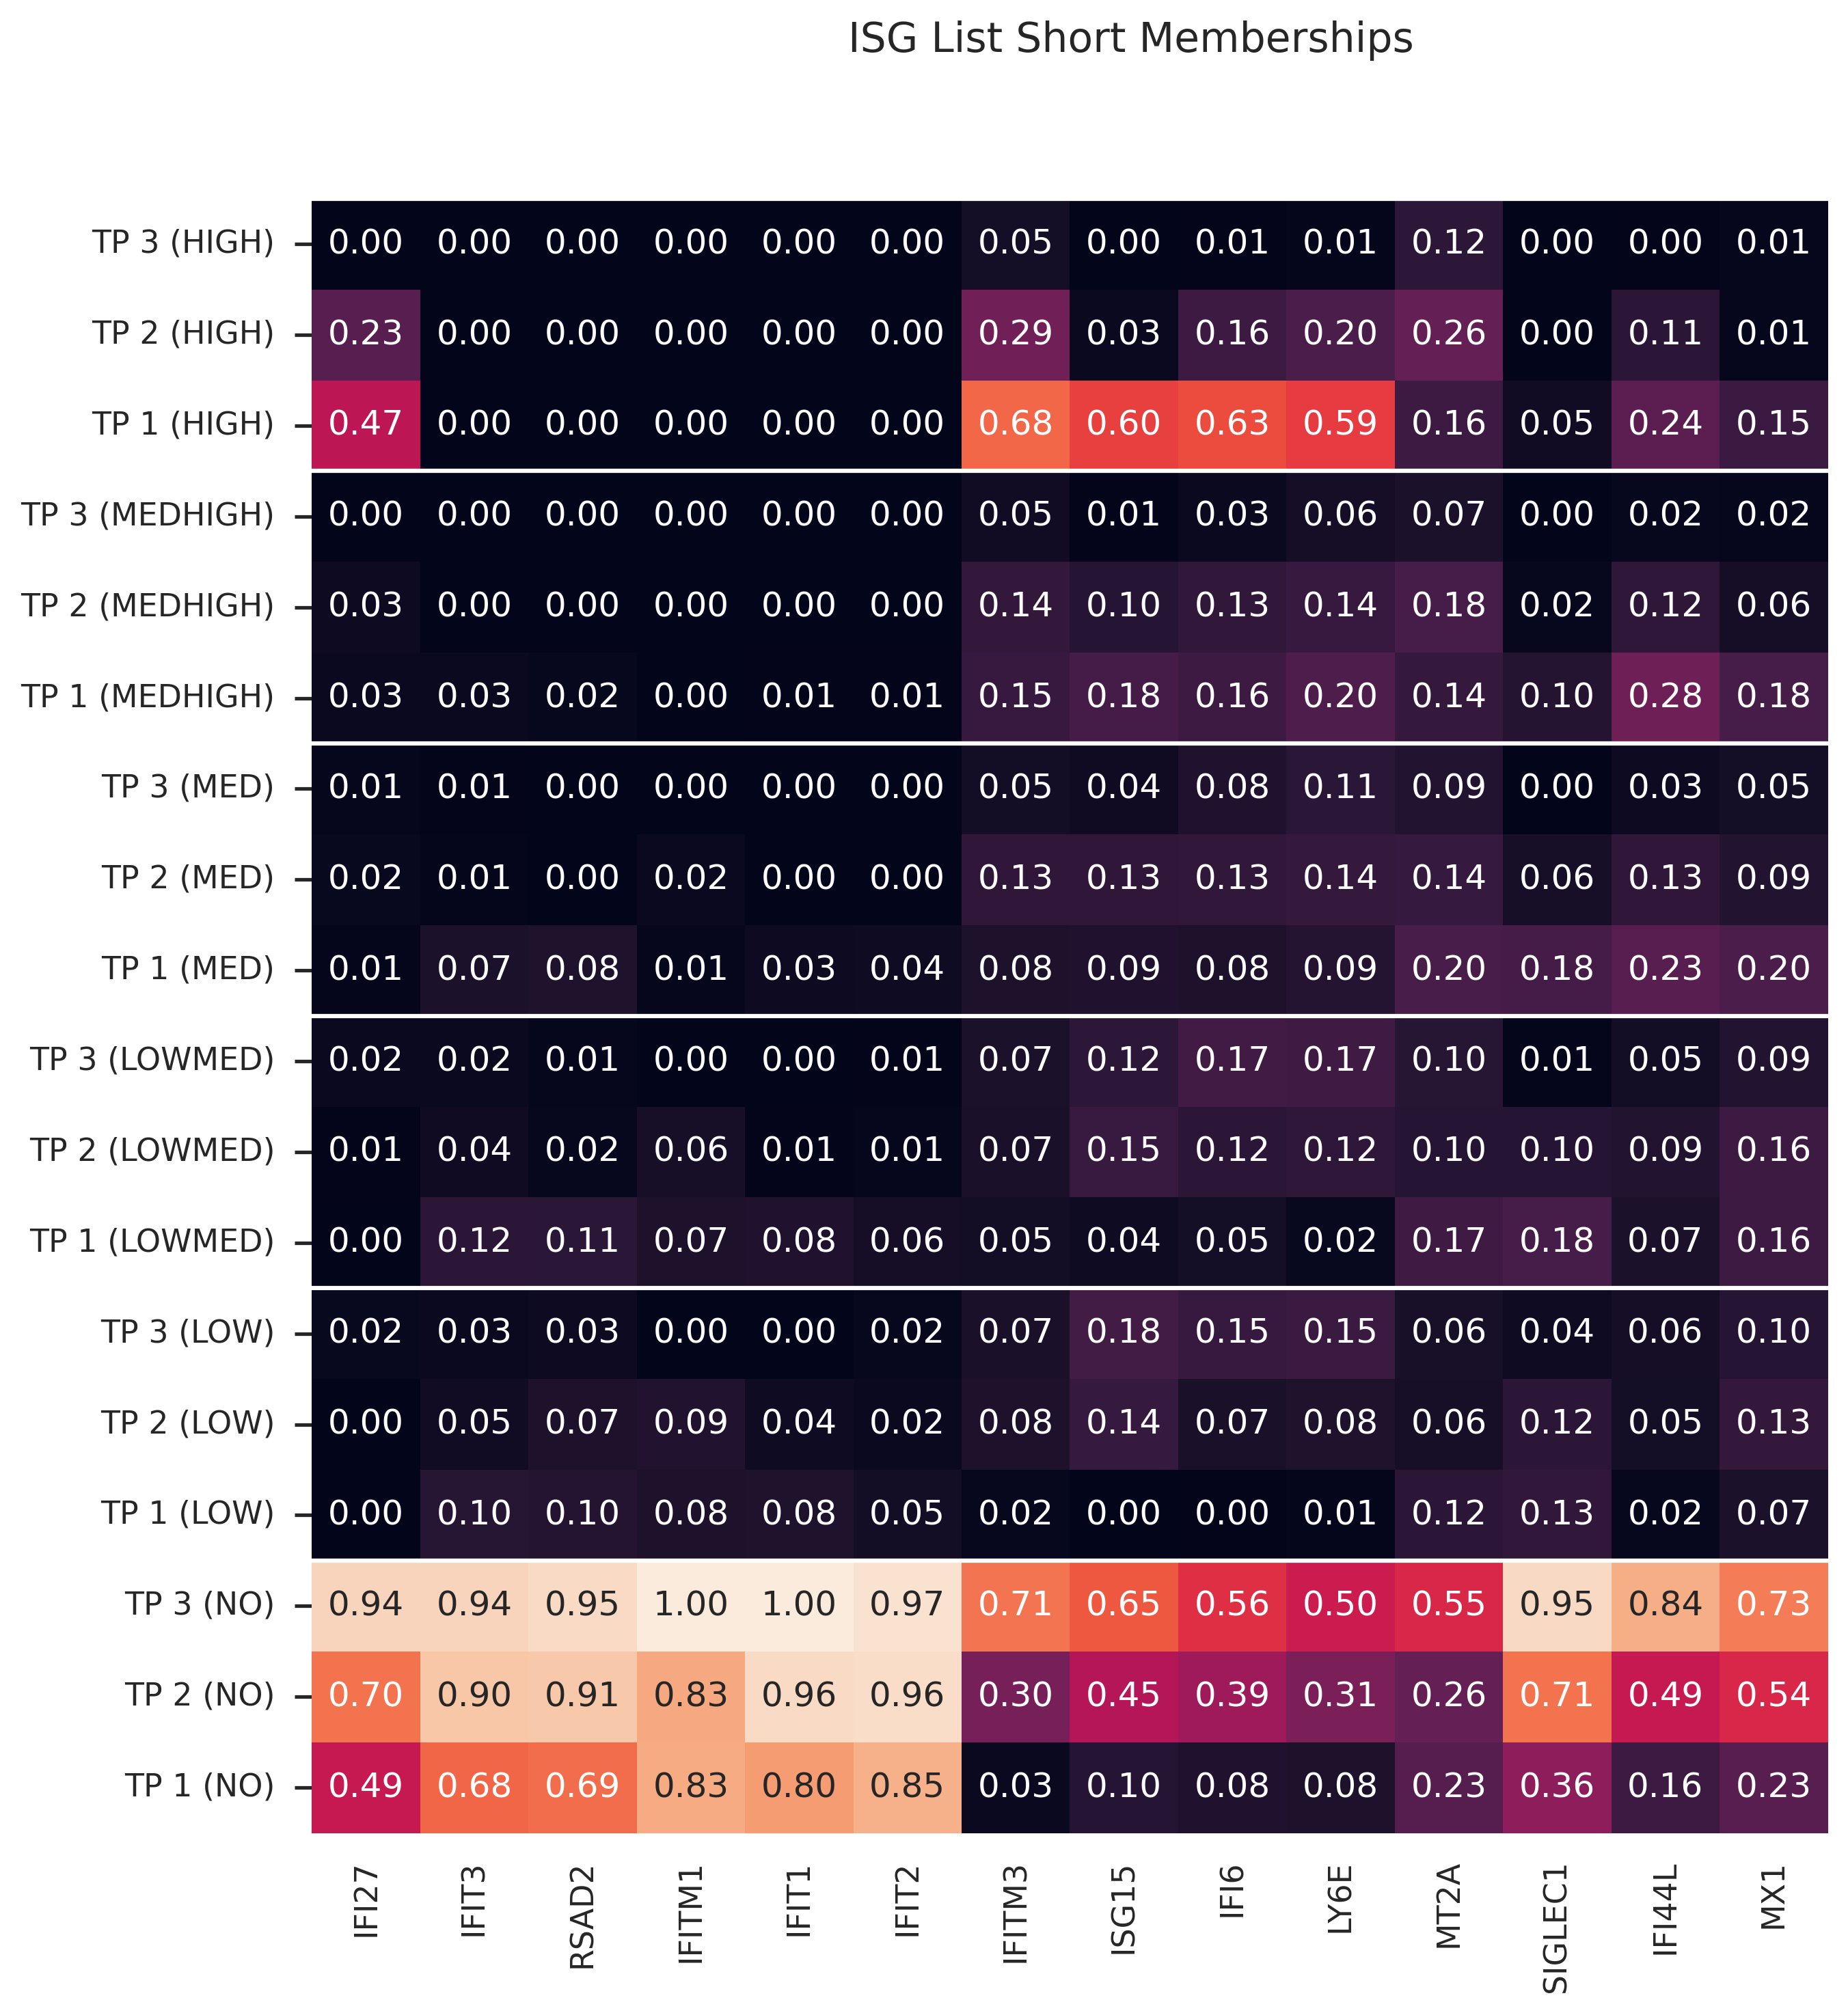

In [26]:
_=fa.plot_state_memberships(genes=isgListShort, name="ISG List Short Memberships", cluster_genes=True, outfile="plots/asympt_memberships", prefix="TP", font_scale=1)

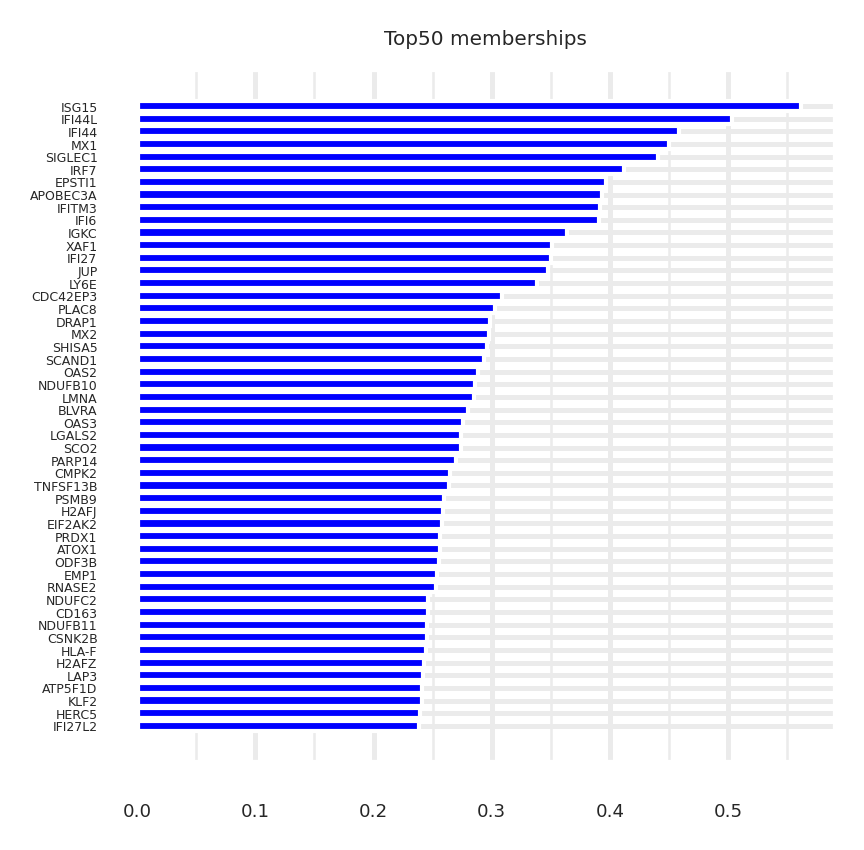

In [14]:
_=fa.plot_flow_memberships(use_flows=relFlows, outfile="plots/asympt_flow_memberships", n_genes=50, gene_exclude_patterns=["AC", "AF", "AL", "LINC"], figsize=(3,3), plot_histogram=False)

Figure Size (12, 14)


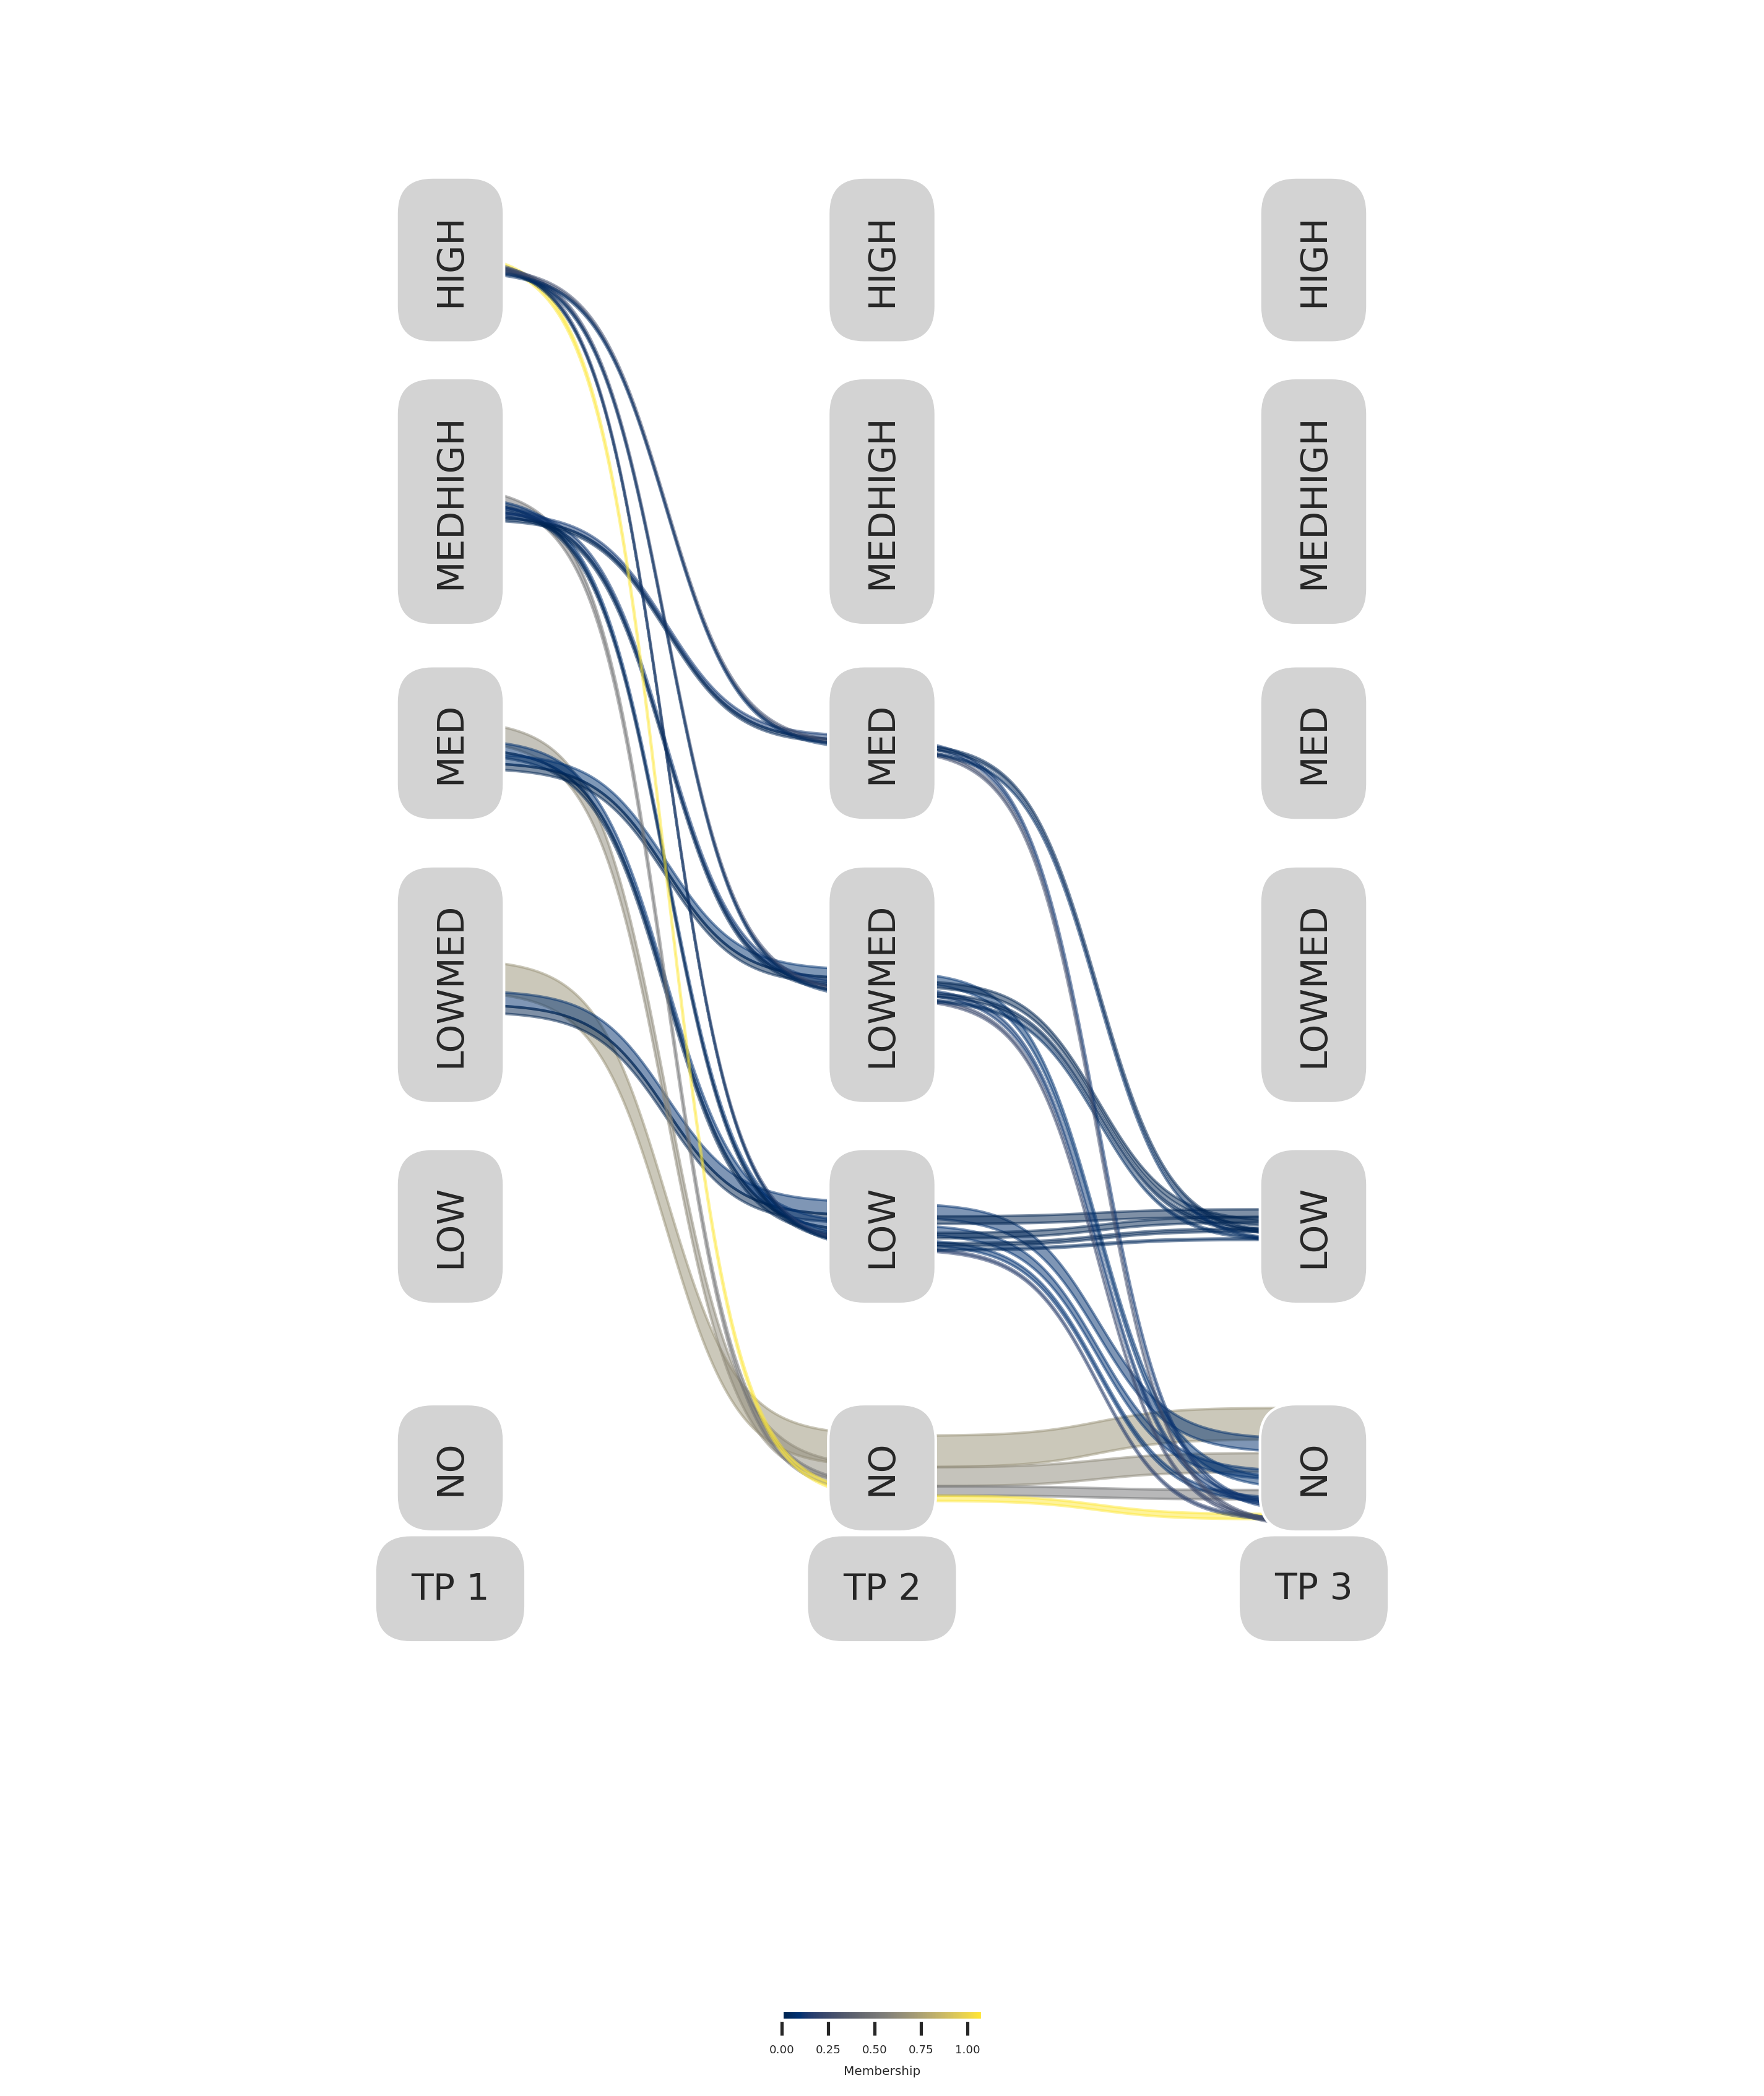

In [15]:
_=fa.visualize_genes(genes=isgListShort, use_flows=relFlows, outfile="plots/asympt_isg_flow")

In [16]:
pwScoresGrpGO = fa.analyse_pathways_grouped(pathways_file="go_human.bp.gmt", additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlows)
pwScoresGrpGO

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]


pwid                                             pwname    pwFlow   
7     GO:0010789  meiotic sister chromatid cohesion involved in ...  0.000000  \
20    GO:1900101  regulation of endoplasmic reticulum unfolded p...  0.012800   
25    GO:0043610             regulation of carbohydrate utilization  0.000000   
28    GO:0072522    purine-containing compound biosynthetic process  0.000000   
29    GO:2001145  negative regulation of phosphatidylinositol-3,...  0.010945   
...          ...                                                ...       ...   
1774  GO:0010976  positive regulation of neuron projection devel...  3.370181   
1860  GO:0001822                                 kidney development  2.507269   
1861  GO:0007568                                              aging  5.114620   
1881  GO:0018108                  peptidyl-tyrosine phosphorylation  4.790718   
2493  GO:0006457                                    protein folding  7.606958   

      pwGenes   allPwFlow    allPwGenes  pw_gene_intersection  pw_coverage   
7           1  495.004484  11415.000213                     1     0.000000  \
20          1  495.004484  11415.000213                     1     0.012800   
25          1  495.004484  11415.000213                     0     0.000000   
28          1  495.004484  11415.000213                     0     0.000000   
29          2  495.004484  11415.000213                     1     0.005473   
...       ...         ...           ...                   ...          ...   
1774      111  495.004484  11415.000213                    73     0.030362   
1860      115  495.004484  11415.000213                    64     0.021802   
1861      146  495.004484  11415.000213                   102     0.035032   
1881      139  495.004484  11415.000213                    99     0.034466   
2493      156  495.004484  11415.000213                   123     0.048763   

      genes_coverage  mean_coverage  pw_coverage_zscore      pval  adj_pval  
7           0.000000   0.000000e+00           -1.027292  1.000000       1.0  
20          0.000026   3.309921e-07           -0.776904  1.000000       1.0  
25          0.000000   0.000000e+00           -1.027292  1.000000       1.0  
28          0.000000   0.000000e+00           -1.027292  1.000000       1.0  
29          0.000022   1.210065e-07           -0.920240  1.000000       1.0  
...              ...            ...                 ...       ...       ...  
1774        0.006808   2.067161e-04           -0.295686  1.000000       1.0  
1860        0.005065   1.104320e-04           -0.910238  1.000000       1.0  
1861        0.010332   3.619634e-04            0.039579  0.484214       1.0  
1881        0.009678   3.335625e-04           -0.001061  1.000000       1.0  
2493        0.015367   7.493561e-04            1.025409  0.152585       1.0  

[12537 rows x 13 columns]

pwid                                             pwname   
12535   ISG_SHORT                                          ISG_SHORT  \
2460   GO:0035456                        response to interferon-beta   
5175   GO:0070106          interleukin-27-mediated signaling pathway   
12536    ISG_LONG                                           ISG_LONG   
7070   GO:0035455                       response to interferon-alpha   
5995   GO:0032020                          ISG15-protein conjugation   
4936   GO:0034340                      response to type I interferon   
397    GO:0045071    negative regulation of viral genome replication   
988    GO:0042776  proton motive force-driven mitochondrial ATP s...   
987    GO:0009060                                aerobic respiration   
7189   GO:0036261             7-methylguanosine cap hypermethylation   
396    GO:0009615                                  response to virus   
1267   GO:0070585              protein localization to mitochondrion   
3296   GO:1903241                    U2-type prespliceosome assembly   
2239   GO:0006122  mitochondrial electron transport, ubiquinol to...   
5173   GO:0060339  negative regulation of type I interferon-media...   
842    GO:0034134             toll-like receptor 2 signaling pathway   
732    GO:0006120  mitochondrial electron transport, NADH to ubiq...   
693    GO:0001732  formation of cytoplasmic translation initiatio...   
8673   GO:0019941   modification-dependent protein catabolic process   

         pwFlow  pwGenes   allPwFlow    allPwGenes  pw_gene_intersection   
12535  4.298351       14  495.004484  11415.000213                    14  \
2460   2.054047       11  495.004484  11415.000213                    10   
5175   1.524804        7  495.004484  11415.000213                     7   
12536  7.791589       55  495.004484  11415.000213                    40   
7070   1.737439       11  495.004484  11415.000213                     9   
5995   1.184435        6  495.004484  11415.000213                     6   
4936   1.591286        9  495.004484  11415.000213                     9   
397    6.068940       44  495.004484  11415.000213                    39   
988    7.379375       64  495.004484  11415.000213                    63   
987    6.994412       66  495.004484  11415.000213                    66   
7189   1.152015        8  495.004484  11415.000213                     8   
396    9.608175      109  495.004484  11415.000213                    88   
1267   1.206754       11  495.004484  11415.000213                     8   
3296   2.678120       24  495.004484  11415.000213                    24   
2239   1.510560       14  495.004484  11415.000213                    13   
5173   2.018333       19  495.004484  11415.000213                    16   
842    0.770107        6  495.004484  11415.000213                     6   
732    4.724959       46  495.004484  11415.000213                    45   
693    1.635702       16  495.004484  11415.000213                    15   
8673   1.110679        9  495.004484  11415.000213                     8   

       pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore   
12535     0.307025        0.008683       0.002666           13.285376  \
2460      0.186732        0.004150       0.000775            7.393273   
5175      0.217829        0.003080       0.000671            6.717306   
12536     0.141665        0.015740       0.002230            6.227873   
7070      0.157949        0.003510       0.000554            5.983472   
5995      0.197406        0.002393       0.000472            5.962556   
4936      0.176810        0.003215       0.000568            5.201415   
397       0.137930        0.012260       0.001691            5.002944   
988       0.115303        0.014908       0.001719            4.680464   
987       0.105976        0.014130       0.001497            4.133006   
7189      0.144002        0.002327       0.000335            3.989001   
396       0.088148        0

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


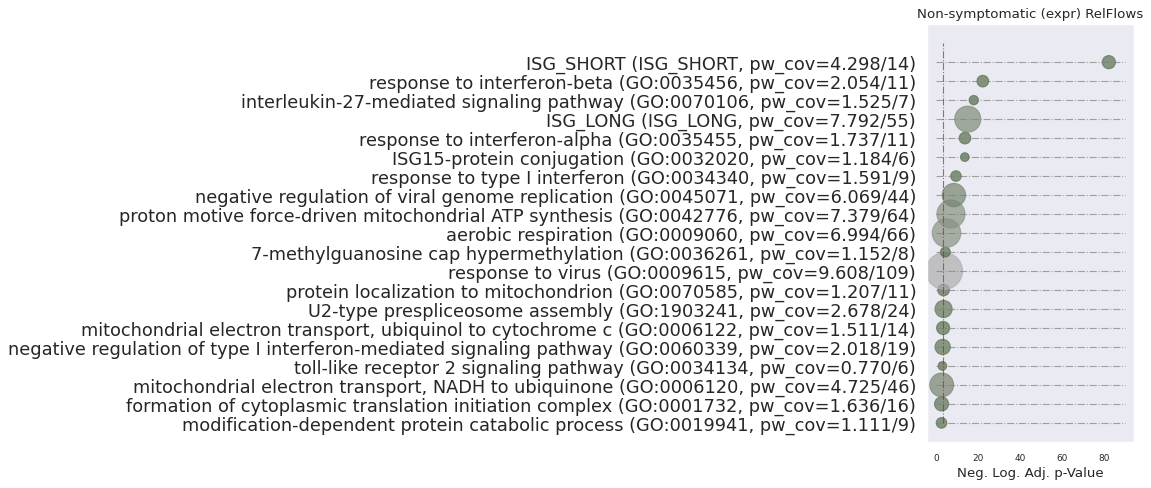

In [17]:
selPWsGrpGO = pwScoresGrpGO[(pwScoresGrpGO["adj_pval"] < 1) & (pwScoresGrpGO["pwGenes"] > 5)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsGrpGO)
fa.plotORAresult(selPWsGrpGO, "Non-symptomatic (expr) RelFlows", numResults=20, figsize=(6,6), outfile="plots/asympt_go")

In [18]:
go=fa.get_pathways("go_human.bp.gmt")

Loading pathways from go_human.bp.gmt
Identified 12535 pathways


<Figure size 300x300 with 0 Axes>

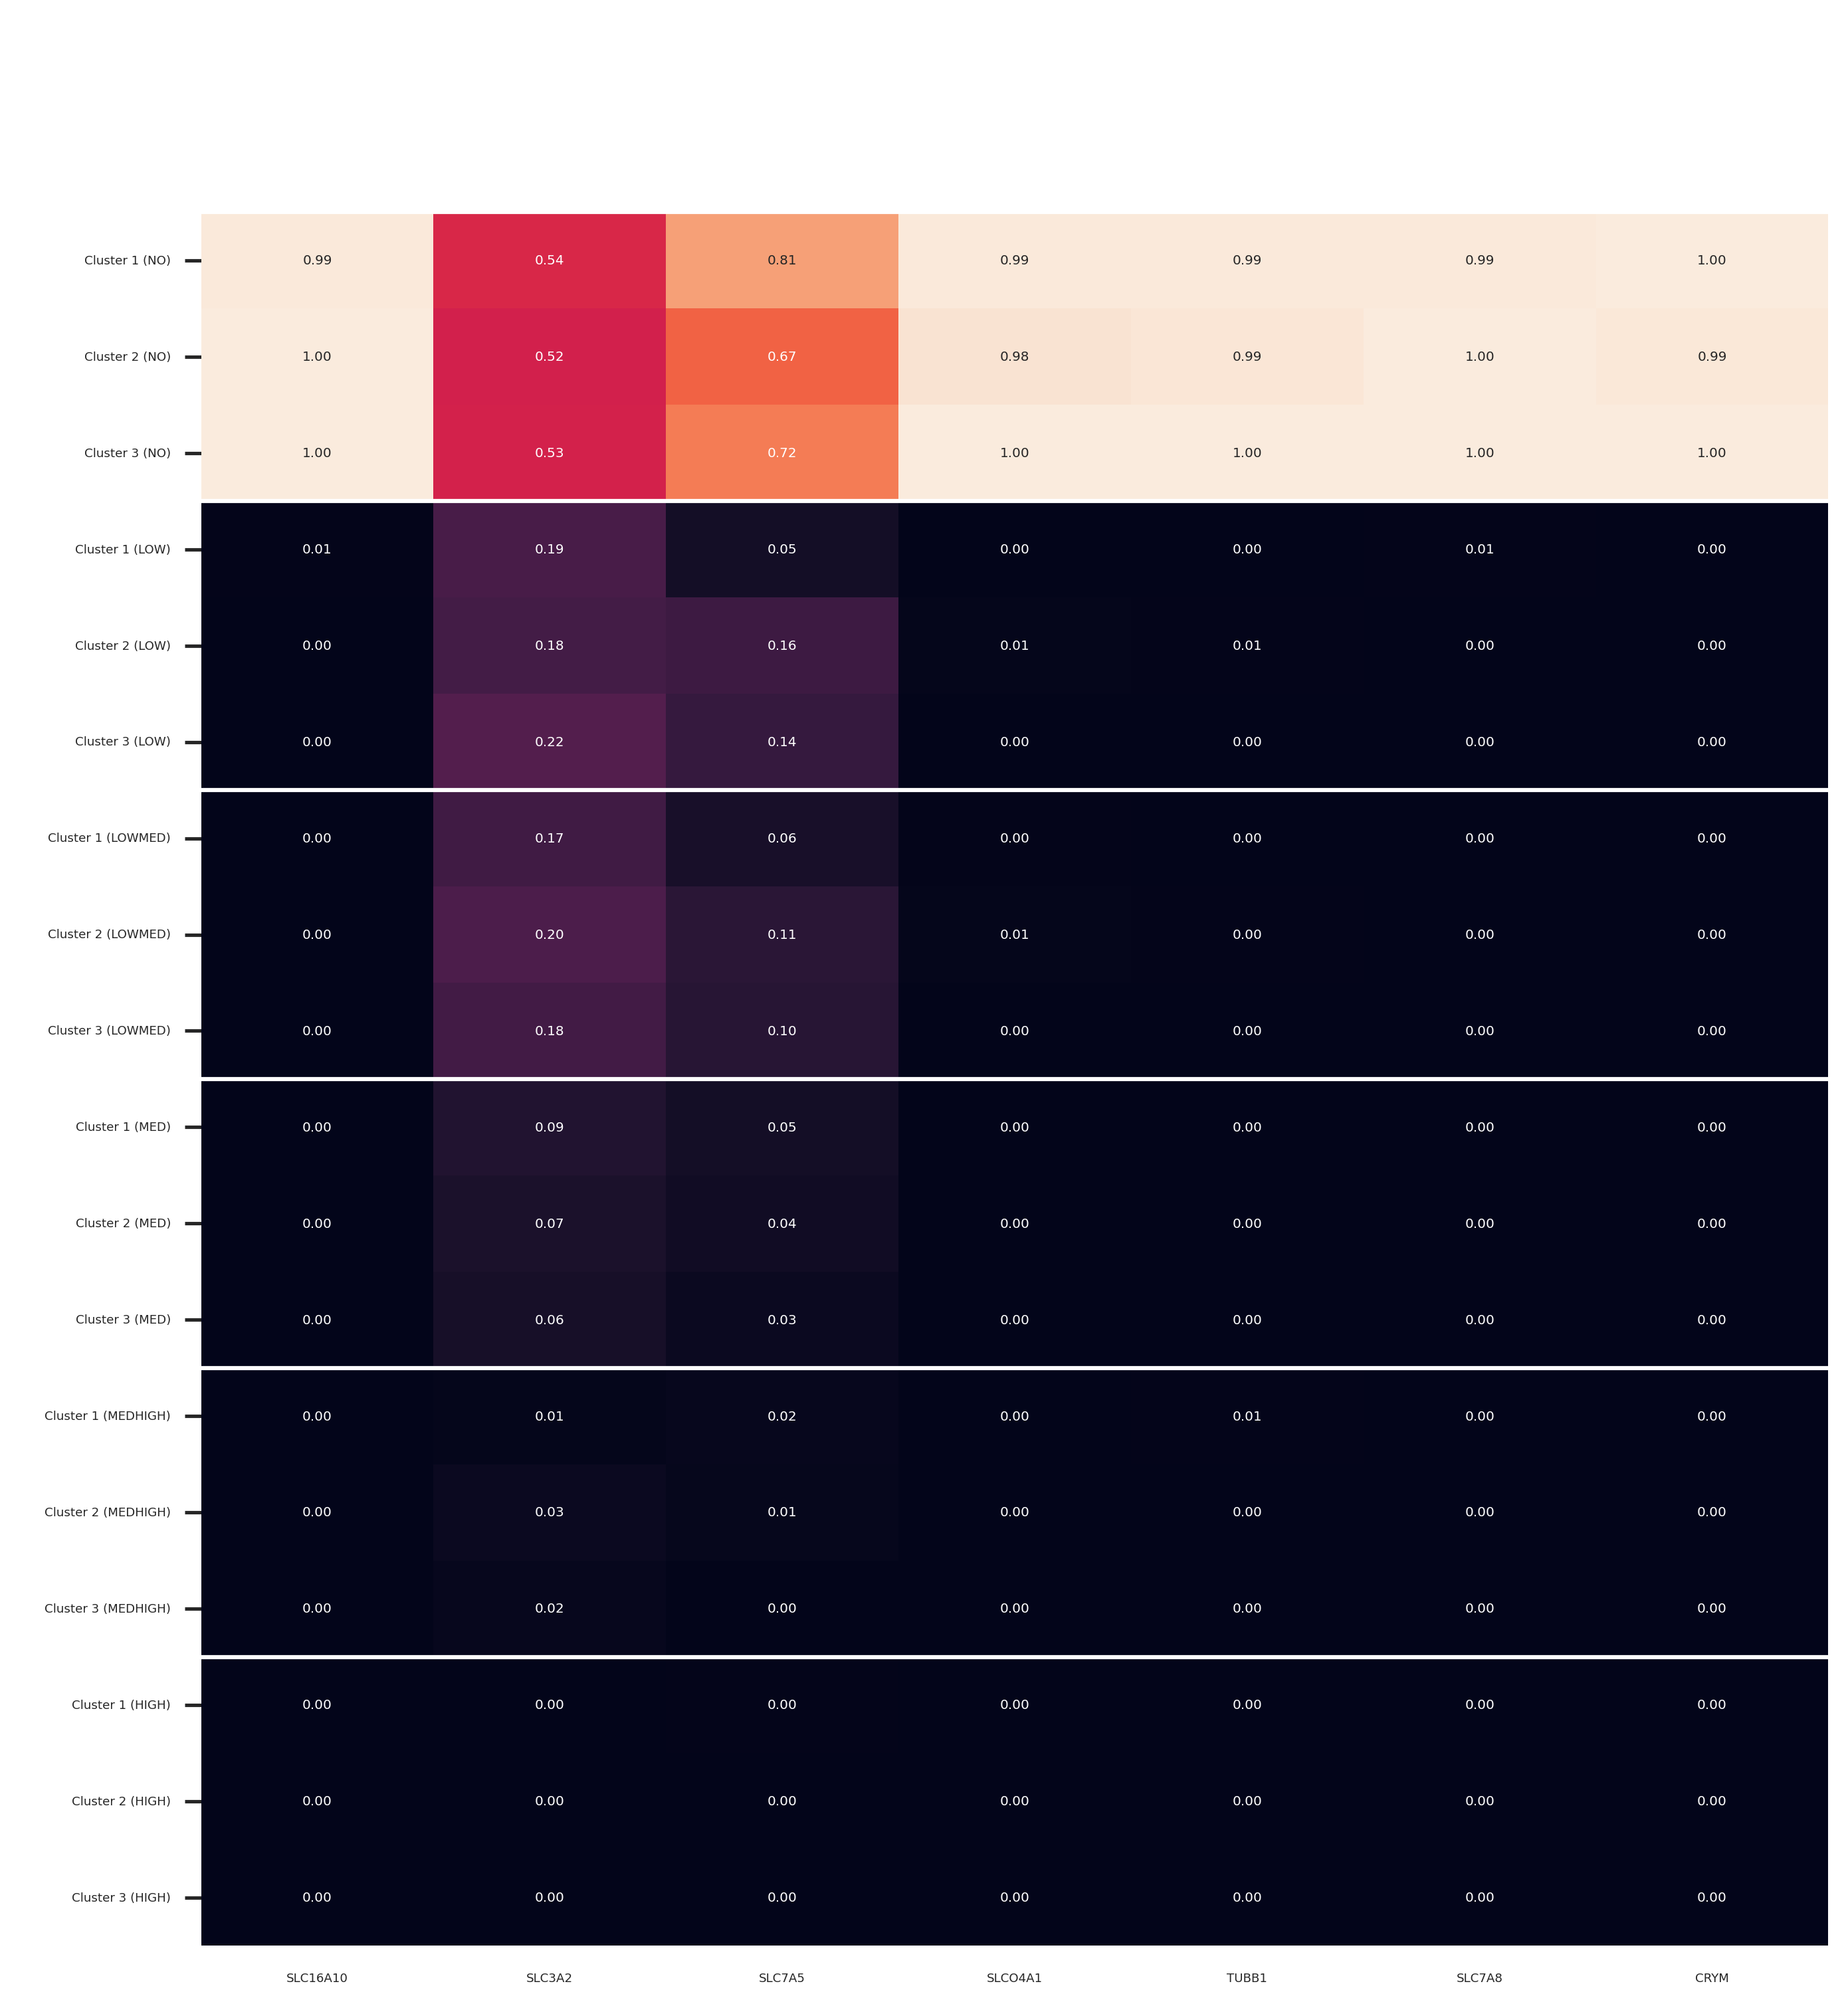

In [19]:
_=fa.plot_state_memberships(go["GO:0070327"][1], name="", figsize=(1,1))

<Figure size 1800x1800 with 0 Axes>

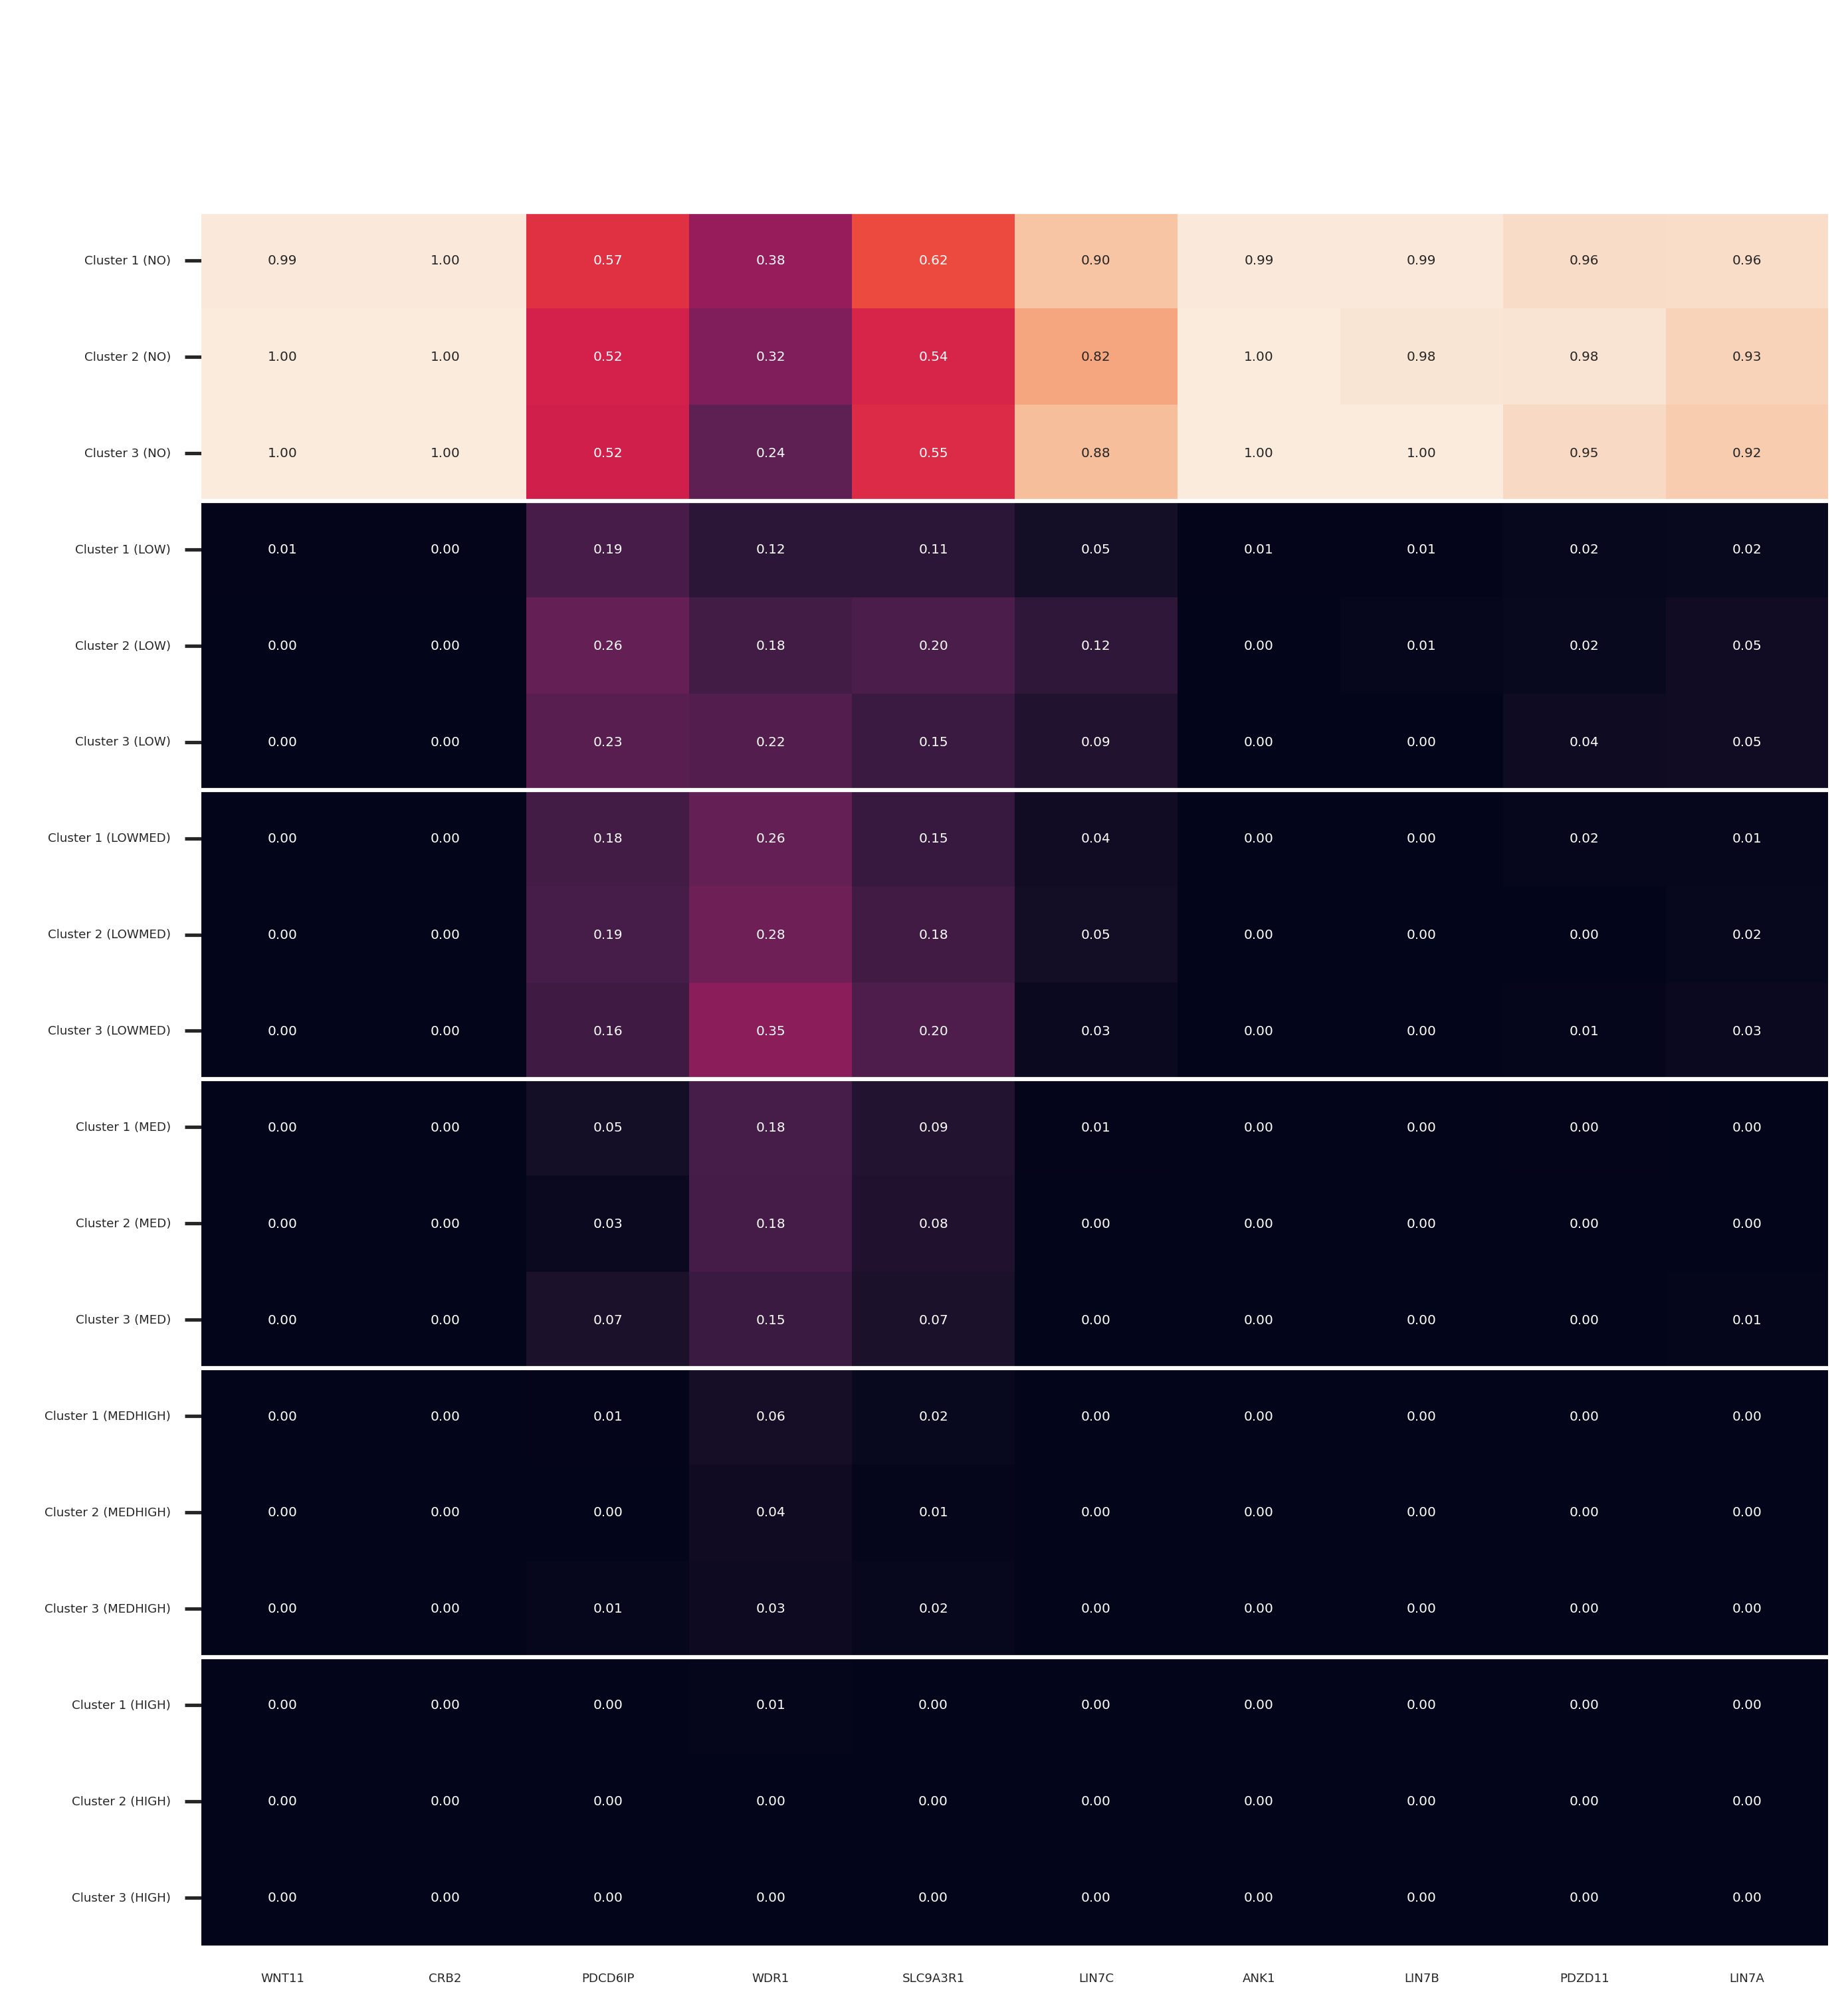

In [20]:
fa.plot_state_memberships(go["GO:0045199"][1], name="")

<Figure size 1800x1800 with 0 Axes>

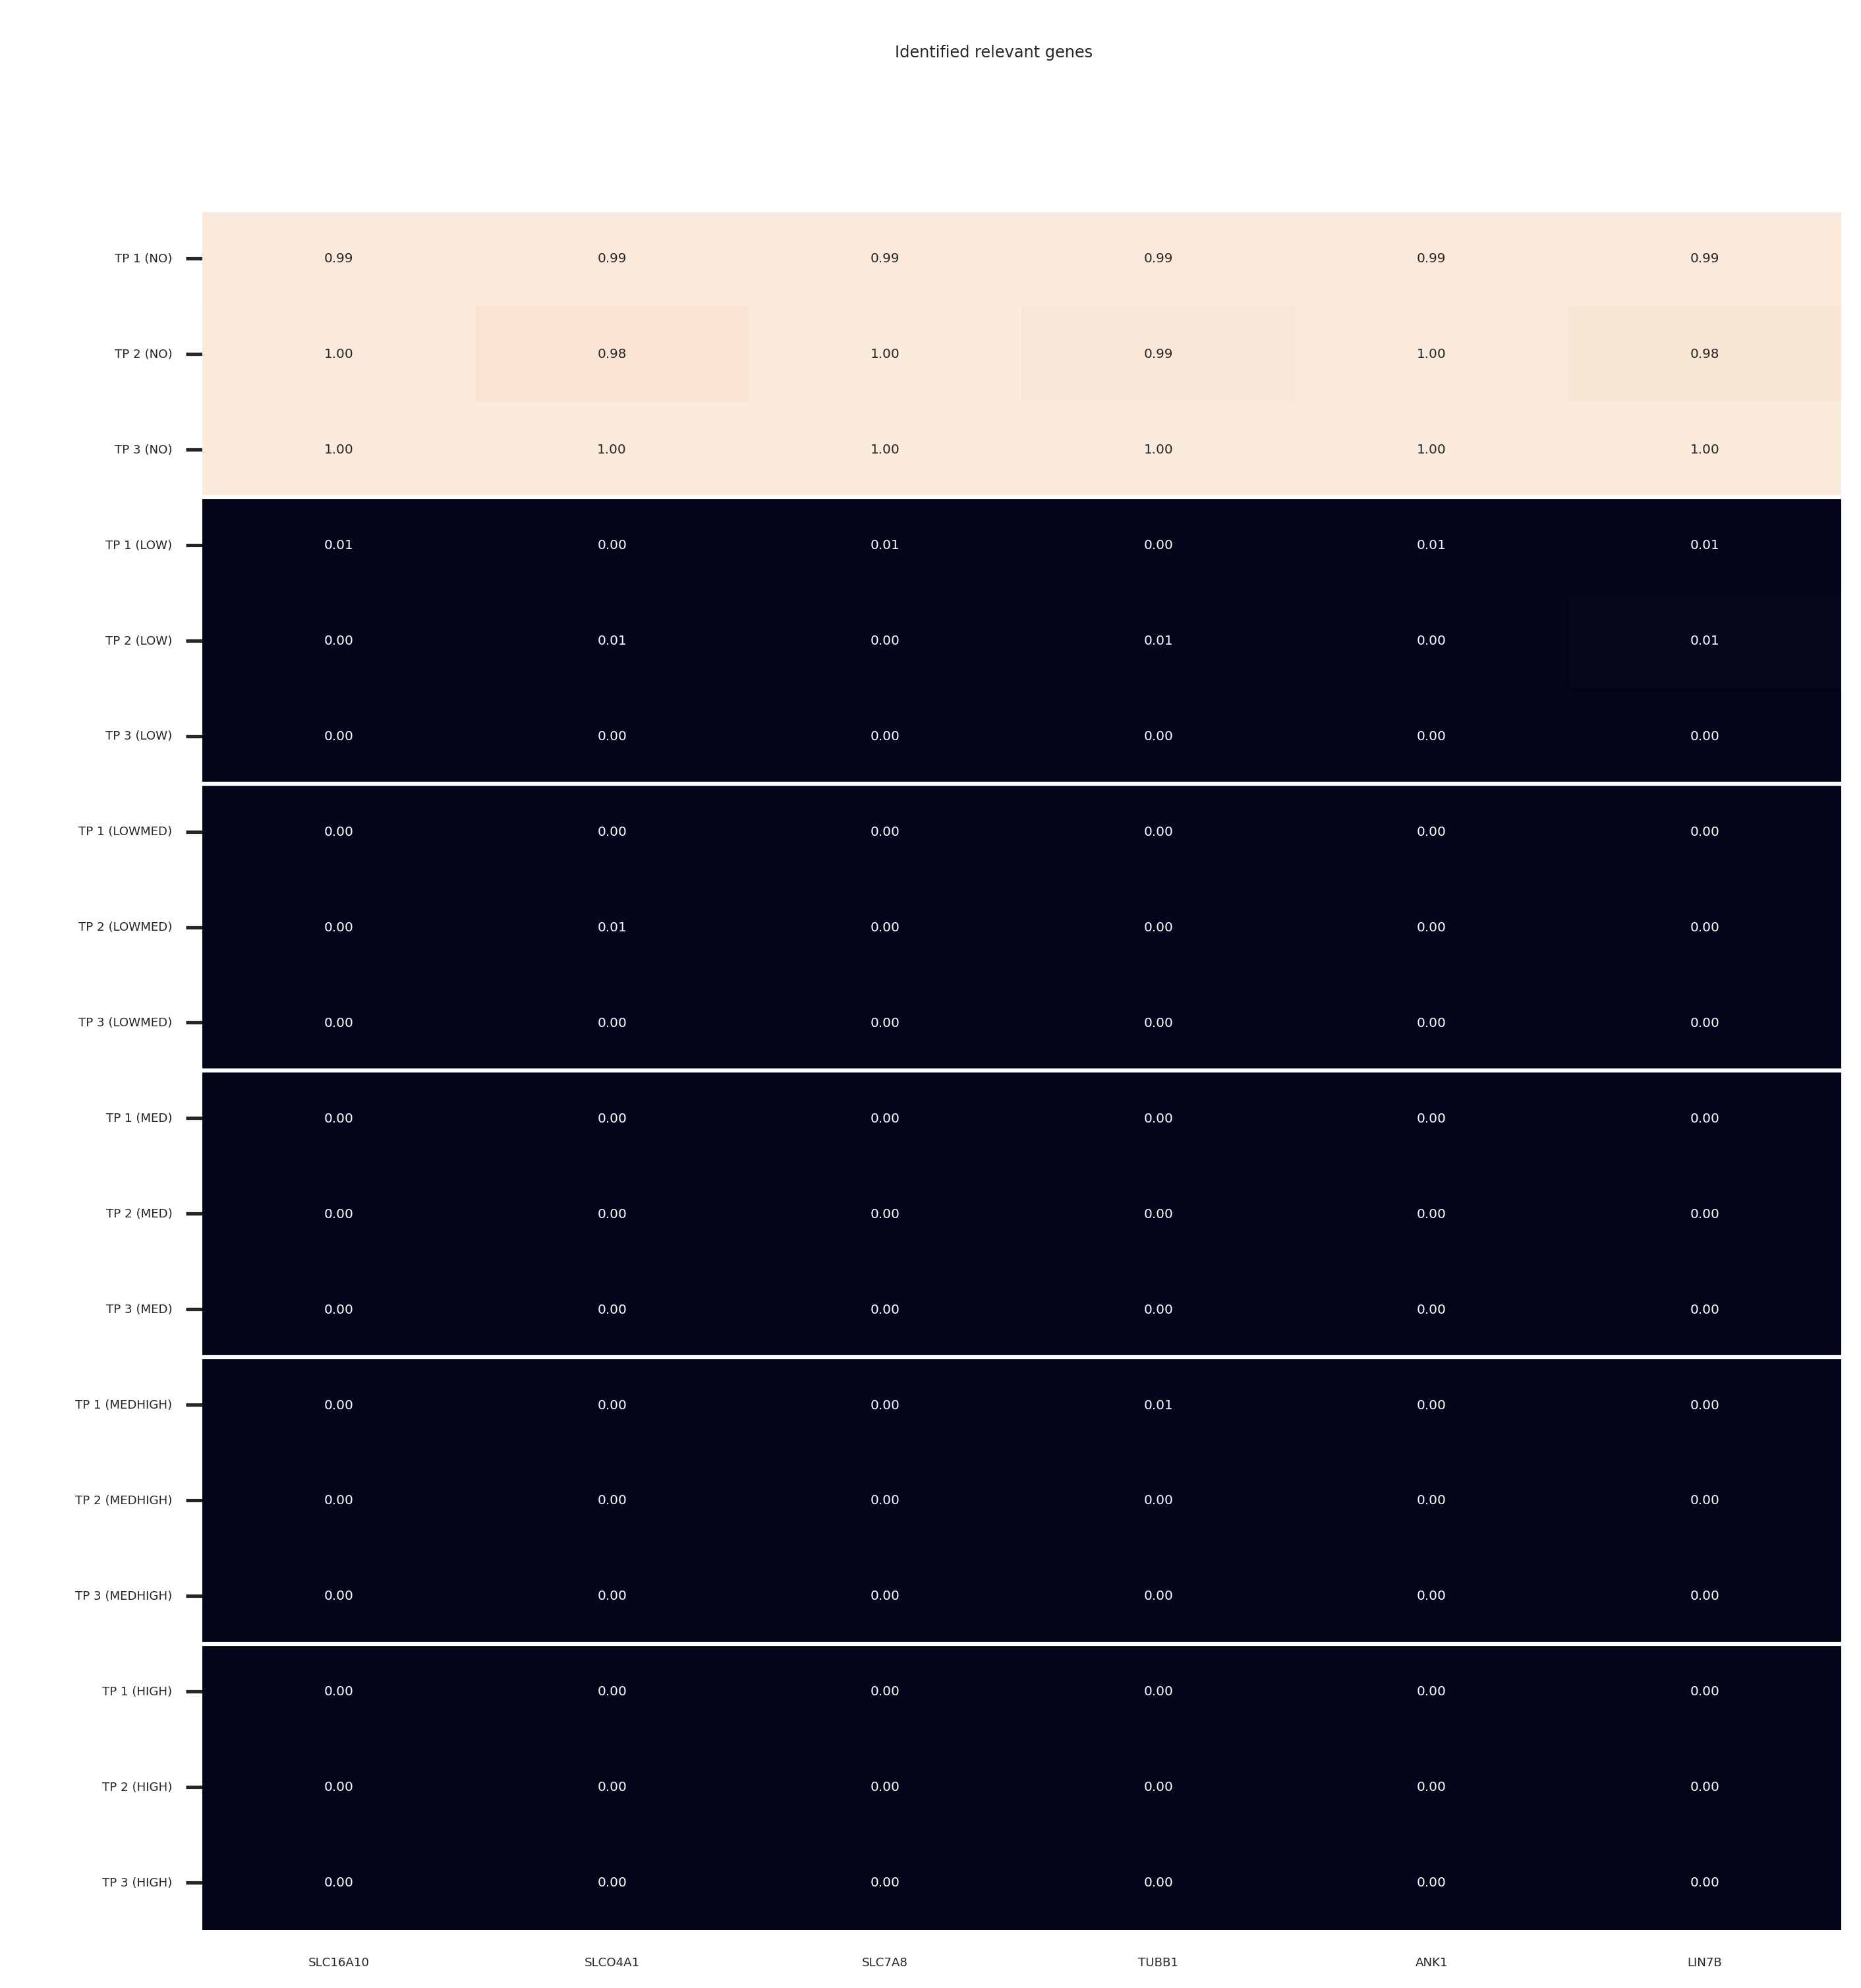

In [21]:
_=fa.plot_state_memberships(genes=["SLC16A10", "SLCO4A1", "SLC7A8", "TUBB1", "ANK1", "LIN7B"], name="Identified relevant genes", outfile=None, prefix="TP")